In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats
import statistics

## data-cons.csv

Datos agregados de consumo, que tienen :
- ID: La información de cuatro edificios, cada entrada con un identificador
- IDdispositivo: Un idenficador de dispositivo que hace referencia al edificio (cuatro valores distintos, 335546925 (?), 335546926 (B), 335546927 (C), 335546928 (A))
- Fecha: La fecha de la entrada: desde el 2021-01-01 al 2021-12-31
- V22: El consumo en dicha fecha

Estos datos son obtenidos de la base de datos.

In [2]:
data = pd.read_csv('data-cons.csv')
print(data.shape)
data.head(3)

(206445, 4)


,ID,IDdispositivo,Fecha,V22
0,4872243,335546925,2021-12-31 23:56:08.958+01,1.136745e+06
1,4872244,335546926,2021-12-31 23:56:08.958+01,8.510530e+04
2,4872242,335546928,2021-12-31 23:56:08.958+01,1.884996e+05


## cons_.csv
- Fecha
- dif_coms: diferencias en el consumo en intervalos de 10 minutos
- cumsum: consumo acumulado

Se obtiene de data-cons.csv

Fecha de inicio: 2020-12-31 23:00:00+00:00 <br>
Fecha de final: 2021-12-31 22:50:00+00:00

En total tenemos 52560 datos para cada edificio

In [3]:
#Edificio A
ids = [335546928]
mask = data['IDdispositivo'].isin(ids)
df = data.loc[mask]
df = df.iloc[::-1]
df.insert(2, "dif_cons", df['V22'].diff(), True)
df = df.set_index('Fecha')
df.index = pd.to_datetime(df.index, utc = True)
df.insert(2, "dif_time", df.index.to_series().diff().dt.seconds.div(60, fill_value=0), True)
df = df.resample('10T')['dif_cons'].sum().to_frame()
df.insert(1, "cumsum", df['dif_cons'].cumsum(), True)
df.to_csv('consA.csv', sep=";")

In [4]:
#Edificio B
ids = [335546926]
mask = data['IDdispositivo'].isin(ids)
df = data.loc[mask]
df = df.iloc[::-1]
df.insert(2, "dif_cons", df['V22'].diff(), True)
df = df.set_index('Fecha')
df.index = pd.to_datetime(df.index, utc = True)
df.insert(2, "dif_time", df.index.to_series().diff().dt.seconds.div(60, fill_value=0), True)
df = df.resample('10T')['dif_cons'].sum().to_frame()
df.insert(1, "cumsum", df['dif_cons'].cumsum(), True)
df.to_csv('consB.csv', sep=";")

In [5]:
#Edificio C
ids = [335546927]
mask = data['IDdispositivo'].isin(ids)
df = data.loc[mask]
df = df.iloc[::-1]
df.insert(2, "dif_cons", df['V22'].diff(), True)
df = df.set_index('Fecha')
df.index = pd.to_datetime(df.index, utc = True)
df.insert(2, "dif_time", df.index.to_series().diff().dt.seconds.div(60, fill_value=0), True)
df = df.resample('10T')['dif_cons'].sum().to_frame()
df.insert(1, "cumsum", df['dif_cons'].cumsum(), True)
df.to_csv('consC.csv', sep=";")

In [6]:
consA = pd.read_csv("consA.csv", sep=";")
consB = pd.read_csv("consB.csv", sep=";")
consC = pd.read_csv("consC.csv", sep=";")
print(consA.shape)
consA.head(3)

(52560, 3)


,Fecha,dif_cons,cumsum
0,2020-12-31 23:00:00+00:00,0.000000,0.000000
1,2020-12-31 23:10:00+00:00,0.234375,0.234375
2,2020-12-31 23:20:00+00:00,0.203125,0.437500


Hay dos picos en el consumo:

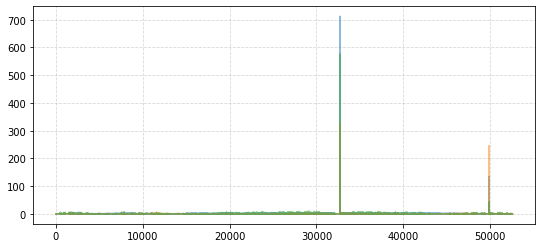

In [7]:
plt.figure(figsize=(9, 4))
plt.plot(consA['dif_cons'], alpha=0.5)
plt.plot(consB['dif_cons'], alpha=0.5)
plt.plot(consC['dif_cons'], alpha=0.5)
plt.grid(linestyle = "--", alpha=0.5)

Identificamos esos picos, que se dan en las mismas fechas para los tres edificios:
2021-08-15 23:00:00+00:00 y 2021-12-13 07:30:00+00:00

In [8]:
consB.where(consB['dif_cons']>25).dropna()

,Fecha,dif_cons,cumsum
32688,2021-08-15 23:00:00+00:00,326.531250,14571.175781
49875,2021-12-13 07:30:00+00:00,246.007812,21944.160156


Quitando esos valores extremos sí se observa una evolución del consumo más razonable

In [9]:
consA = consA.where(consB['dif_cons']<25).dropna()
consB = consB.where(consB['dif_cons']<25).dropna()
consC = consC.where(consB['dif_cons']<25).dropna()

In [10]:
consA.head(3)

,Fecha,dif_cons,cumsum
0,2020-12-31 23:00:00+00:00,0.000000,0.000000
1,2020-12-31 23:10:00+00:00,0.234375,0.234375
2,2020-12-31 23:20:00+00:00,0.203125,0.437500


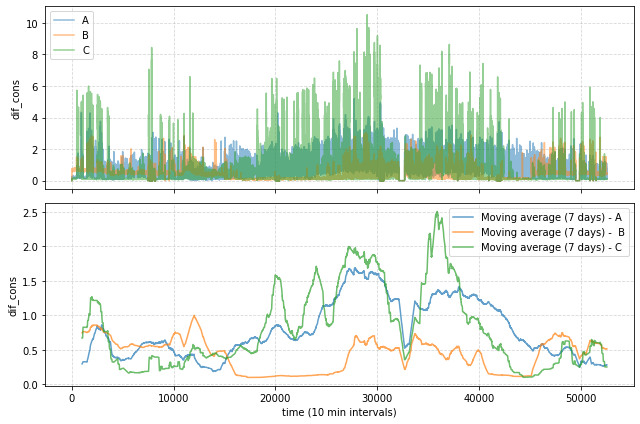

In [11]:
fig, axs = plt.subplots(figsize=(9,6), nrows = 2, ncols =1, sharex =True)

axs[0].plot(consA['dif_cons'], label="A", alpha=0.5)
axs[0].plot(consB['dif_cons'], label="B", alpha=0.5)
axs[0].plot(consC['dif_cons'], label="C", alpha=0.5)
axs[0].grid(linestyle = "--", alpha=0.5)
axs[0].legend(loc="upper left")
axs[0].set_ylabel("dif_cons")
#Media móvil de 1 semana
axs[1].plot(consA['dif_cons'].rolling(144*7).mean(), label="Moving average (7 days) - A", alpha=0.7)
axs[1].plot(consB['dif_cons'].rolling(144*7).mean(), label="Moving average (7 days) -  B", alpha=0.7)
axs[1].plot(consC['dif_cons'].rolling(144*7).mean(), label="Moving average (7 days) - C", alpha=0.7)
axs[1].grid(linestyle = "--", alpha=0.5)
axs[1].set_ylabel("dif_cons")
axs[1].set_xlabel('time (10 min intervals)')
axs[1].legend()
fig.tight_layout()
plt.savefig("./pics/cons.pdf", format="pdf")
plt.show()

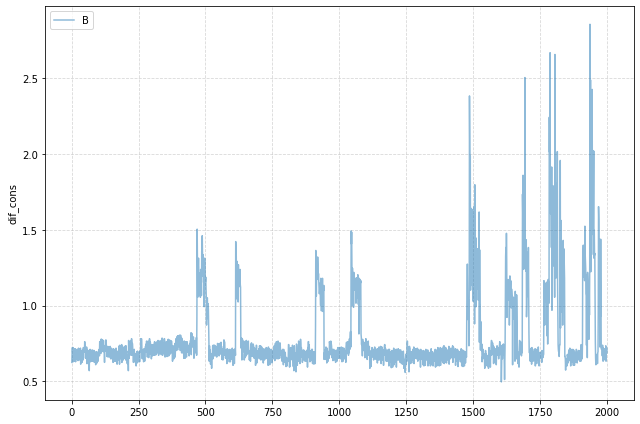

In [12]:
fig, axs = plt.subplots(figsize=(9,6), nrows = 1, ncols =1, sharex =True)

#axs.plot(consA['dif_cons'][1:2000], label="A", alpha=0.5)
axs.plot(consB['dif_cons'][1:2000], label="B", alpha=0.5)
#axs[0].plot(consC['dif_cons'], label="C", alpha=0.5)
axs.grid(linestyle = "--", alpha=0.5)
axs.legend(loc="upper left")
axs.set_ylabel("dif_cons")
fig.tight_layout()
plt.show()

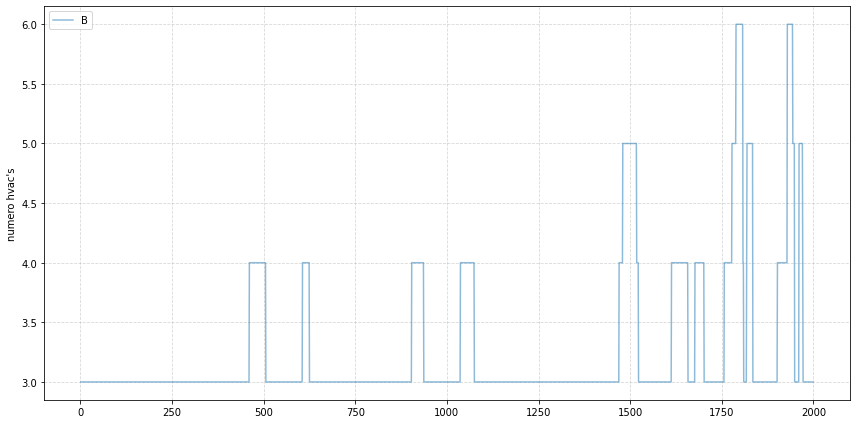

In [13]:
hvac_mixedA = pd.read_csv("hvac-mixedA-10T.csv", sep=";")
hvac_mixedB = pd.read_csv("hvac-mixedB-10T.csv", sep=";")
hvac_mixedC = pd.read_csv("hvac-mixedC-10T.csv", sep=";")
hvac_mixedC.head()

fig, axs = plt.subplots(figsize=(12,6), nrows = 1, ncols =1, sharex =True)

#axs.plot(hvac_mixedA['V4'][1:2000], label="A", alpha=0.5)
axs.plot(hvac_mixedB['V4'][1:2000], label="B", alpha=0.5)
#axs.plot(hvac_mixedC['V4'], label="C", alpha=0.5)
axs.grid(linestyle = "--", alpha=0.5)
axs.legend(loc="upper left")
axs.set_ylabel("numero hvac's")
fig.tight_layout()
plt.show()

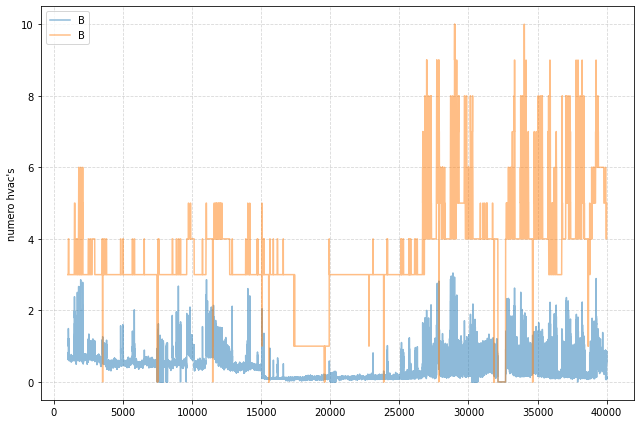

In [30]:
fig, axs = plt.subplots(figsize=(9,6), nrows = 1, ncols =1, sharex =True)

#axs.plot(consA['dif_cons'][1:3000], label="A", alpha=0.5)
axs.plot(consA['dif_cons'][1000:40000], label="B", alpha=0.5)
#axs[0].plot(consC['dif_cons'], label="C", alpha=0.5)
axs.grid(linestyle = "--", alpha=0.5)
axs.legend(loc="upper left")
axs.set_ylabel("dif_cons")
#axs.plot(hvac_mixedA['V4'][1:3000], label="A", alpha=0.5)
axs.plot(hvac_mixedB['V4'][1000:40000], label="B", alpha=0.5)
#axs.plot(hvac_mixedC['V4'], label="C", alpha=0.5)
axs.grid(linestyle = "--", alpha=0.5)
axs.legend(loc="upper left")
axs.set_ylabel("numero hvac's")
fig.tight_layout()
plt.show()

Vemos la evolución del consumo en los tres edificios

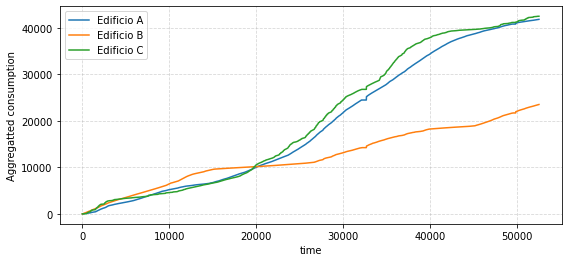

In [12]:

plt.figure(figsize=(9, 4))
plt.plot(consA['cumsum'], label = "Edificio A")
plt.plot(consB['cumsum'], label = "Edificio B")
plt.plot(consC['cumsum'], label = "Edificio C")
plt.grid(linestyle = "--", alpha=0.5)
plt.xlabel("time")
plt.ylabel("Aggregatted consumption")
plt.legend()

In [13]:
df1 = pd.merge(consA[['Fecha','cumsum']],consB[['Fecha','cumsum']], on = "Fecha", suffixes=('_A', '_B'))
df2 = pd.merge(df1[['Fecha','cumsum_A', 'cumsum_B']],consC[['Fecha','cumsum']], on = "Fecha").rename(columns={"cumsum": "cumsum_C"})
df2.rename(columns={"cumsum": "cumsum_C"})
df3 = pd.merge(consA[['Fecha','dif_cons']],consB[['Fecha','dif_cons']], on = "Fecha", suffixes=('_A', '_B'))
df4 = pd.merge(df3[['Fecha','dif_cons_A', 'dif_cons_B']],consC[['Fecha','dif_cons']], on = "Fecha").rename(columns={"dif_cons": "dif_cons_C"})
df4.rename(columns={"dif_cons": "dif_cons_C"})

,Fecha,dif_cons_A,dif_cons_B,dif_cons_C
0,2020-12-31 23:00:00+00:00,0.000000,0.000000,0.000000
1,2020-12-31 23:10:00+00:00,0.234375,0.625000,0.117188
2,2020-12-31 23:20:00+00:00,0.203125,0.691406,0.117188
3,2020-12-31 23:30:00+00:00,0.203125,0.722656,0.101562
4,2020-12-31 23:40:00+00:00,0.218750,0.691406,0.125000
...,...,...,...,...
52553,2021-12-31 22:10:00+00:00,0.156250,0.476562,0.093750
52554,2021-12-31 22:20:00+00:00,0.500000,0.476562,0.093750
52555,2021-12-31 22:30:00+00:00,0.234375,0.414062,0.093750
52556,2021-12-31 22:40:00+00:00,0.203125,0.453125,0.093750


In [13]:

corr_dif=df4.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

NameError: name 'df4' is not defined

NameError: name 'corr_cumsum' is not defined

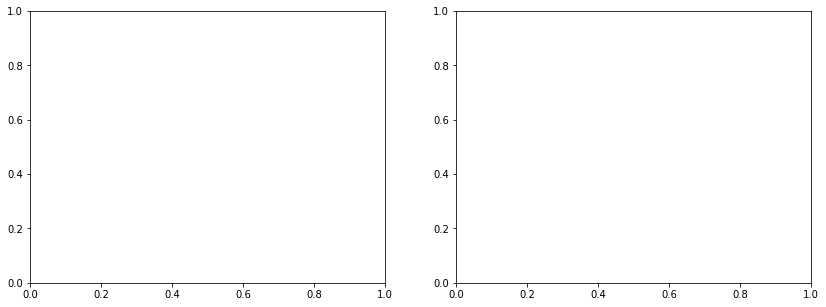

In [15]:


fig = plt.figure(figsize = (14,5)) # width x height
ax1 = fig.add_subplot(1, 2, 1) # row, column, position
ax2 = fig.add_subplot(1, 2, 2)
with sns.axes_style("white"):
    ax1 = sns.heatmap(corr_cumsum, ax=ax1,
                     xticklabels=corr_cumsum, yticklabels=corr_cumsum,
                     mask=mask, vmin=0.9, vmax=1, square=True,
                     annot = True, linewidths=.5, cmap="Blues")
    ax2 = sns.heatmap(corr, ax=ax2,
                 xticklabels=corr_dif, yticklabels=corr_dif,
                 mask=mask, vmin=0, vmax=1, square=True,
                 annot = True, linewidths=.5, cmap="Blues")

## data-sensor.csv
- Id
- IDdispositivo: ids de los sensores, tenemos para <br>
 - edificio A: [335544455, 335544458, 335544461, 335544472, 335544479, 335544488,
       335544491, 335544499, 335544506, 335544517, 335544522, 335544529,
       335544532, 335544542, 335544547, 335544554, 335544557, 335544563,
       335544569, 335544575, 335544605, 335544613, 335544628, 335544639,
       335544648, 335544655, 335544660, 335544672, 335544736, 335544739,
       335544747, 335544750, 335544764, 335544770, 335544790, 335544791,
       335544792, 335544811, 335544812, 335544979, 335545134, 335547743,
       335547759, 335547765, 335547778, 335547785, 335547798, 335547804,
       335547817]<br>
 
 - edificio B: [335544685, 335544692, 335544699, 335544720, 335544721, 335544823,
       335544830, 335544838, 335544857, 335544858, 335544863, 335544977,
       335545020, 335545055, 335545056, 335545087, 335545091, 335547856,
       335547861, 335547871, 335547879, 335547886, 335547887, 335547901,
       335547902, 335547903, 335547925, 335547926, 335547940, 335547950,
       335547951, 335547965, 335547966, 335547967, 335548038] <br>

 - edificio C: [335544931, 335544934, 335544941, 335544948, 335545128, 335545129]
- Fecha
- V2: temperatura de la habitación registrada por los sensores

Estos datos son obtenidos de la base de datos.

In [16]:
data = pd.read_csv('data-sensor.csv', sep=';')

In [17]:
print(data.shape)
data.head(3)

(9857796, 3)


,IDdispositivo,Fecha,V2
0,335544547,2021-12-31 23:55:19.635+01,22.659363
1,335544544,2021-12-31 23:55:19.635+01,5.000000
2,335544543,2021-12-31 23:55:19.635+01,34.481567


## temp-sensor_.csv

- Fecha
- V2: temperatura del sensor, agregada con resample de 10min, con valores limitados entre 15 y 38 grados. Este dato es la media de lo recogido por los sensores de cada habitación

Se obtiene de data-sensor.csv

Los ids de los sensores para cada uno de los edificios los obtenemos de relations-sensor.csv viendo los valores que toma el campo 'ID' haciendo un where en 'block', y son los siguientes:

In [21]:
ids_sensor_A = [335544455, 335544458, 335544461, 335544472, 335544479, 335544488,
       335544491, 335544499, 335544506, 335544517, 335544522, 335544529,
       335544532, 335544542, 335544547, 335544554, 335544557, 335544563,
       335544569, 335544575, 335544605, 335544613, 335544628, 335544639,
       335544648, 335544655, 335544660, 335544672, 335544736, 335544739,
       335544747, 335544750, 335544764, 335544770, 335544790, 335544791,
       335544792, 335544811, 335544812, 335544979, 335545134, 335547743,
       335547759, 335547765, 335547778, 335547785, 335547798, 335547804,
       335547817]

ids_sensor_B = [335544685, 335544692, 335544699, 335544720, 335544721, 335544823,
       335544830, 335544838, 335544857, 335544858, 335544863, 335544977,
       335545020, 335545055, 335545056, 335545087, 335545091, 335547856,
       335547861, 335547871, 335547879, 335547886, 335547887, 335547901,
       335547902, 335547903, 335547925, 335547926, 335547940, 335547950,
       335547951, 335547965, 335547966, 335547967, 335548038]

ids_sensor_C = [335544931, 335544934, 335544941, 335544948, 335545128, 335545129]

Hacemos los fichero temp_sensor_.csv para cada uno de los edificios:

In [23]:
#Edificio A
import pandas as pd
#data = pd.read_csv('data-sensor.csv') 
ids = ids_sensor_A
mask = data['IDdispositivo'].isin(ids)
df = data.loc[mask]
df = df.set_index('Fecha')
df.index = pd.to_datetime(df.index, utc = True)
df = df.groupby('IDdispositivo').resample('10T')['V2'].mean().loc[lambda x: (x>15) & (x <38)].to_frame()
df = df.reset_index()
#df[['Fecha', 'V2']].groupby('Fecha').mean().head()
df = df[['Fecha', 'V2']].groupby([pd.Grouper(key='Fecha')]).mean()
df.to_csv('temp-sensorA.csv', sep=";")

In [24]:
#Edificio B
import pandas as pd
#data = pd.read_csv('data-sensor.csv') 
ids = ids_sensor_B
mask = data['IDdispositivo'].isin(ids)
df = data.loc[mask]
df = df.set_index('Fecha')
df.index = pd.to_datetime(df.index, utc = True)
df = df.groupby('IDdispositivo').resample('10T')['V2'].mean().loc[lambda x: (x>15) & (x <38)].to_frame()
df = df.reset_index()
#df[['Fecha', 'V2']].groupby('Fecha').mean().head()
df = df[['Fecha', 'V2']].groupby([pd.Grouper(key='Fecha')]).mean()
df.to_csv('temp-sensorB.csv', sep=";")

In [25]:
#Edificio C
import pandas as pd
#data = pd.read_csv('data-sensor.csv') 
ids = ids_sensor_C
mask = data['IDdispositivo'].isin(ids)
df = data.loc[mask]
df = df.set_index('Fecha')
df.index = pd.to_datetime(df.index, utc = True)
df = df.groupby('IDdispositivo').resample('10T')['V2'].mean().loc[lambda x: (x>15) & (x <38)].to_frame()
df = df.reset_index()
#df[['Fecha', 'V2']].groupby('Fecha').mean().head()
df = df[['Fecha', 'V2']].groupby([pd.Grouper(key='Fecha')]).mean()
df.to_csv('temp-sensorC.csv', sep=";")

In [26]:
temp_sensorA = pd.read_csv("temp-sensorA.csv", sep=";")
temp_sensorB = pd.read_csv("temp-sensorB.csv", sep=";")
temp_sensorC = pd.read_csv("temp-sensorC.csv", sep=";")
print(temp_sensorA.shape)
temp_sensorA.head(3)

(51618, 2)


,Fecha,V2
0,2020-12-31 23:00:00+00:00,23.094798
1,2020-12-31 23:10:00+00:00,23.077371
2,2020-12-31 23:20:00+00:00,23.077103


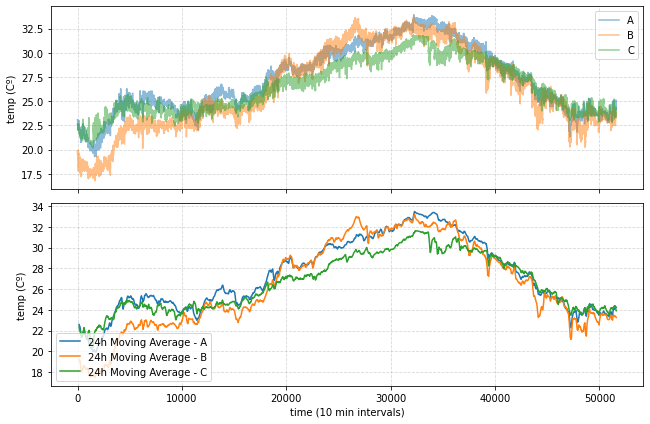

In [29]:
fig, axs = plt.subplots(figsize=(9,6), nrows = 2, ncols =1, sharex =True)

axs[0].plot(temp_sensorA['V2'], label = "A", alpha = 0.5)
axs[0].plot(temp_sensorB['V2'], label = "B", alpha = 0.5)
axs[0].plot(temp_sensorC['V2'], label = "C", alpha = 0.5)
axs[0].grid(linestyle = "--", alpha=0.5)
axs[0].set_ylabel('temp (Cº)')
axs[0].legend()
axs[1].plot(temp_sensorA['V2'].rolling(144).mean(),label= '24h Moving Average - A')
axs[1].plot(temp_sensorB['V2'].rolling(144).mean(),label= '24h Moving Average - B')
axs[1].plot(temp_sensorC['V2'].rolling(144).mean(),label= '24h Moving Average - C')
axs[1].legend(loc="lower left")
axs[1].grid(linestyle = "--", alpha=0.5)
axs[1].set_xlabel('time (10 min intervals)')
axs[1].set_ylabel('temp (Cº)')
fig.tight_layout()
plt.savefig("./pics/temp.pdf", format="pdf")
plt.show()

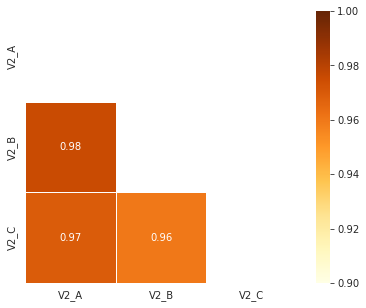

In [30]:
df1 = pd.merge(temp_sensorA[['Fecha','V2']],temp_sensorB[['Fecha','V2']], on = "Fecha", suffixes=('_A', '_B'))
df2 = pd.merge(df1[['Fecha','V2_A', 'V2_B']],temp_sensorC[['Fecha','V2']], on = "Fecha").rename(columns={"V2": "V2_C"})
df2.rename(columns={"V2": "V2_C"})
corr=df2.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(7, 5))
    ax = sns.heatmap(corr, 
                     xticklabels=corr, yticklabels=corr,
                     mask=mask, vmin=0.9, vmax=1, square=True,
                     annot = True, linewidths=.5, cmap="YlOrBr")

## data-hvac.csv
- ID
- IDdispositivo: identificador del hvac
- Fecha
- V4: indica el estado, 0 si es OFF, 1 si es ON
- V5: Modo de operación (byte) (editable):
    * 0 = no establecido en escritura (realmente no se va a escribir ese valor nunca) e inválido en lectura
    * 1 = calor
    * 2 = frío
    * 3 = seco
    * 4 = ventilador
    * 5 = auto en escritura, y auto heat en lectura
    * 6 = auto cool en lectura
    * 7 = no establecido en lectura
- V6: velocidad del ventilador:
    * 0 = valor inválido
    * 1 = parado
    * 2 = automático
    * 3 = alta
    * 4 = media
    * 5 = baja
    * 6 = ultra baja
    * 7 = no establecida
- V12: temperatura de consigna / setpoint

In [31]:
data = pd.read_csv("data-hvac.csv")
print(data.shape)
data.head(3)

(4339076, 6)


,IDdispositivo,Fecha,V4,V5,V6,V12
0,335545219,2021-12-31 23:51:40.395+01,0,1,3,29.0
1,335545217,2021-12-31 23:51:40.395+01,0,1,3,23.0
2,335545215,2021-12-31 23:51:40.395+01,0,1,3,23.0


In [32]:
data.dtypes

IDdispositivo      int64
Fecha             object
V4                 int64
V5                 int64
V6                 int64
V12              float64
dtype: object

In [33]:
data['V4'].value_counts()

0    3727094
1     611982
Name: V4, dtype: int64

In [34]:
data['V5'].value_counts()

2    2711095
1    1501110
0     114369
3      11638
4        864
Name: V5, dtype: int64

In [35]:
set1 =[1, 2, 3, 3, 4, 4, 4, 5, 5, 6]
statistics.mode(set1)


4

In [36]:
data.isnull().sum()

IDdispositivo    0
Fecha            0
V4               0
V5               0
V6               0
V12              0
dtype: int64

- En un momento dado, V12 pasa a ser 0 a pesar de que V4 sigue siendo 1 y V6 tampoco ha cambiado, y esto se da muchas veces: <br>
$\rightarrow$ Corregir ese error haciendo que si ha aparecido un 0 en V12, se reescriba con el anterior setpoint diferente de 0. <br>
$\rightarrow$ Importante: el df viene ordenado por fecha, por lo que hay que distinguir ID's al hacer esto.

- Si V4 es 0, V6 también debe indicar que el ventilador está apagado

- También: Recodificamos el V6, para después hacer One Hot (no nos sirve ponerla como numérica porque el auto no lo podemos poner como numeral ordenado) (viendo los valores que aparecen encontramos que no hay ni 1, ni 6, ni 7):
    * 0 = Apagado (Agrupa 0,1,7)
    * 1 = baja (5)
    * 2 = media (4)
    * 3 = alta (3)
    * 4 = automatico (2)
    
- Idea: para V12 cuando V4 es 0, que tome el valor de V2¿?

In [8]:
#Numero de entradas con V12=0
num_nulls = data.where(data['V12']==0).dropna().shape[0]
num_nulls

547085

In [9]:
#Inconsistencias con V12 y V4
df = data.where((data['IDdispositivo']==335545215) & (data['V4']==1.0)).dropna()
df.iloc[588:593]

,IDdispositivo,Fecha,V4,V5,V6,V12
1252990,335545215.0,2021-09-21 13:58:13.646+02,1.0,2.0,3.0,22.0
1253079,335545215.0,2021-09-21 13:48:11.807+02,1.0,2.0,3.0,22.0
1253082,335545215.0,2021-09-21 13:39:28.976+02,1.0,2.0,3.0,22.0
1253522,335545215.0,2021-09-21 12:58:11.173+02,1.0,2.0,3.0,0.0
1253525,335545215.0,2021-09-21 12:50:31.978+02,1.0,2.0,3.0,0.0


In [10]:
#Valores que toma V6
data['V6'].unique()

array([3, 2, 5, 4, 0], dtype=int64)

In [11]:
#Valores que toma V12
V12 = data['V12'].unique()
V12.sort()
V12

array([-35.  , -34.5 , -34.  , -33.5 , -33.  , -31.5 , -31.  , -30.5 ,
         0.  ,  20.5 ,  21.  ,  21.5 ,  22.  ,  22.5 ,  23.  ,  23.5 ,
        24.  ,  24.5 ,  25.  ,  25.5 ,  26.  ,  26.5 ,  27.  ,  28.  ,
        29.  ,  30.  ,  30.5 ,  31.  ,  32.5 ,  33.  ,  33.5 ,  34.5 ,
        35.  ,  35.5 ,  61.  ,  61.48,  62.  ,  63.  ,  63.48,  64.  ,
        66.  ,  68.  ])

Además de 0's, hay valores negativos y también mayores que 60 $\rightarrow$ Añadimos una condición más para que estos valores se reescriban por el último válido.

In [12]:
mask = (data['V12']<=0) | (data['V12']>60)
data.loc[mask, 'V12'] = np.nan

In [13]:
data['V12'].unique()

array([29. , 23. ,  nan, 24. , 22. , 25. , 28. , 27. , 26. , 21. , 22.5,
       21.5, 26.5, 25.5, 23.5, 24.5, 32.5, 30.5, 20.5, 35. , 31. , 34.5,
       30. , 35.5, 33.5, 33. ])

In [60]:
def recode_V6(V6):
    if V6 == 0 : return 0
    if V6 == 5 : return 1
    if V6 == 4 : return 2
    if V6 == 3 : return 3
    if V6 == 2 : return 4

In [63]:
data['V6'] = data['V6'].apply(recode_V6)

In [67]:
#def correccion_V4_V6(V4,V6):
#    if V4 == 1: return V6
#    if V4 == 0: return 0

In [79]:
#V6 será 0 si V4 es 0
#data['V6'] = data[['V4','V6']].apply(lambda x: correccion_V4_V6(x['V4'], x['V6']), axis=1)

In [14]:
ids_hvac_A = [335545141, 335545231, 335545233, 335545239, 335545235, 335545237,
       335545221, 335545223, 335545225, 335545227, 335545229, 335545245,
       335545241, 335545243, 335545251, 335545253, 335545255, 335545249,
       335545247, 335545257, 335545259, 335545263, 335545261, 335545265,
       335545267, 335545269, 335545277, 335545279, 335545281, 335545271,
       335545275, 335545273, 335545283, 335545285, 335545287, 335545293,
       335545289, 335545291, 335545301, 335545295, 335545297, 335545299,
       335545303, 335545305, 335545307, 335545309, 335545311, 335545313,
       335545315]

ids_hvac_B = [335545147, 335545149, 335545143, 335545163, 335545165, 335545161,
       335545155, 335545153, 335545159, 335545151, 335545157, 335545203,
       335545205, 335545201, 335545197, 335545199, 335545217, 335545219,
       335545213, 335545215, 335545207, 335545209, 335545211]

ids_hvac_C = [335545193, 335545191, 335545189, 335545187, 335545183, 335545177,
       335545181, 335545179, 335545185, 335545167, 335545169, 335545171,
       335545175, 335545173]

## hvac-mixed_.csv

Join para tener número de hvac encendidos y su temperatura media

In [118]:
data['V5'].value_counts()

2    2711095
1    1501110
0     114369
3      11638
4        864
Name: V5, dtype: int64

In [156]:
#Edificio A 
ids = ids_hvac_C
mask = data['IDdispositivo'].isin(ids)
df = data.loc[mask]

#mask = df['V12']>0  #Correción: aquí antes ponía (df['V4']!=0) & (df['V12']>0)
#df0 = df.loc[mask]
#df0 = df.set_index('Fecha')
#df0.index = pd.to_datetime(df0.index, utc = True)

#Ordenamos por ID y fecha para tener todos los registros de cada hvac seguidos y además ordenaods por fecha
#Después cambiamos los 0's de V12 por nulos y hacemos foward fill para reemplazarlo por el último valor no nulo
df = df.sort_values(by=['IDdispositivo', 'Fecha'], ascending=True)
mask = (data['V12']<=0) | (data['V12']>60)
data.loc[mask, 'V12'] = np.nan
df['V12'] = df['V12'].fillna(method="ffill")

In [157]:
df['V12'].unique()

array([23. , 29. , 25. , 26. , 24. , 28. , 27. , 22. , 21. , 31. , 35. ,
       22.5, 21.5])

In [45]:
#df['V12'].value_counts()

In [158]:
#Reeordenamos por fecha
df = df.sort_values(by=['Fecha'], ascending=False)
df0 = df.set_index('Fecha')
df0.index = pd.to_datetime(df0.index, utc = True)
#df0.head(3)

In [159]:
df0['V12'].unique()

array([28. , 23. , 27. , 24. , 25. , 26. , 22.5, 29. , 21.5, 22. , 21. ,
       35. , 31. ])

In [160]:
df1 = df0.groupby('IDdispositivo').resample('10T')['V4'].mean().to_frame()
df1 = df1.reset_index()
dfON = df1[['Fecha', 'V4']].groupby(['Fecha']).sum().round(0)
#dfON.head(3)

In [161]:
dfON['V4'].unique()

array([ 0.,  1.,  2.,  4.,  3.,  5.,  6.,  7.,  8.,  9., 10.])

In [162]:
df2 = df0.groupby('IDdispositivo').resample('10T')['V12'].mean().to_frame().reset_index()
df2['V12'] = df2['V12'].fillna(method="ffill")
dfSETpoint = df2[['Fecha', 'V12']].groupby(['Fecha']).mean().round(2)

In [163]:
dfSETpoint['V12'].unique()

array([25.14, 25.  , 24.86, 24.93, 24.82, 24.79, 25.21, 25.29, 25.07,
       25.18, 25.25, 25.11, 25.36, 24.71, 24.75, 25.05, 24.5 , 24.6 ,
       24.57, 23.64, 23.68, 23.71, 23.93, 23.79, 23.89, 23.86, 23.82,
       24.  , 23.57, 23.43, 23.5 , 23.46, 23.36, 23.61, 23.39, 24.21,
       23.54, 24.07, 23.96, 24.04, 23.9 , 24.14, 24.36, 24.25, 25.04,
       24.96, 25.33, 25.43, 25.5 , 25.54, 25.64, 25.46, 25.32])

In [ ]:
#La moda se ejecuta muy lenta o da error
#def mode(xs):
#    return stats.mode(xs)[0]
#.apply(mode)

In [23]:
#df3 = df0.groupby('IDdispositivo').resample('10T')['V6'].median().to_frame().reset_index()
#df3['V6'] = df3['V6'].fillna(method="ffill")
#dfV6median = df3[['Fecha', 'V6']].groupby(['Fecha']).median()

In [24]:
#Se quedan solo los valores 2 (media) y 3 (alta)
dfV6median['V6'].value_counts()

2.0    44337
3.0     8223
Name: V6, dtype: int64

In [164]:
df3 = df0.groupby('IDdispositivo').resample('10T')['V5'].median().to_frame().reset_index()
df3['V5'] = df3['V5'].fillna(method="ffill")
dfV5median = df3[['Fecha', 'V5']].groupby(['Fecha']).median()

In [165]:
#df3['V6'] = df3['V6'].fillna(method="ffill")
dfV5median['V5'].value_counts()

1.0    27358
2.0    25201
0.0        1
Name: V5, dtype: int64

In [166]:
mixed = dfON.merge(dfSETpoint, left_index=True, right_index=True, how='outer')
mixed = mixed.merge(dfV5median, left_index=True, right_index=True, how='outer')
mixed['V5'] = mixed['V5'].astype(int)
#mixed['V6'] = mixed['V6'].astype(int)

In [167]:
mixed = pd.concat([mixed, pd.get_dummies(mixed.V5, prefix='V5')], axis=1).drop(columns=['V5', 'V5_0'])

In [168]:
def hora_(Hora):
    if Hora in range(6,14): return 1
    if Hora in range(14,22): return 2
    if Hora in [22,23,0,1,2,3,4,5]: return 3
    
mixed['Hora'] = mixed.index.hour
mixed['Hora'] = mixed['Hora'].apply(hora_).astype(int)

mixed = pd.concat([mixed, pd.get_dummies(mixed.Hora, prefix='Hora')], axis=1).drop(columns=['Hora'])


In [169]:
mixed

,V4,V12,V5_1,V5_2,Hora_1,Hora_2,Hora_3
Fecha,,,,,,,
2020-12-31 23:00:00+00:00,0.0,25.14,1,0,0,0,1
2020-12-31 23:10:00+00:00,0.0,25.14,1,0,0,0,1
2020-12-31 23:20:00+00:00,0.0,25.14,1,0,0,0,1
2020-12-31 23:30:00+00:00,0.0,25.14,1,0,0,0,1
2020-12-31 23:40:00+00:00,0.0,25.14,1,0,0,0,1
...,...,...,...,...,...,...,...
2021-12-31 22:10:00+00:00,0.0,25.00,1,0,0,0,1
2021-12-31 22:20:00+00:00,0.0,25.00,1,0,0,0,1
2021-12-31 22:30:00+00:00,0.0,25.00,1,0,0,0,1


In [170]:
mixed.to_csv('hvac-mixedC.csv', sep=";")

In [113]:
#Edificio A 
ids = ids_hvac_A
mask = data['IDdispositivo'].isin(ids)
df = data.loc[mask]

#Ordenamos por ID y fecha para tener todos los registros de cada hvac seguidos y además ordenaods por fecha
#Después cambiamos los 0's de V12 por nulos y hacemos foward fill para reemplazarlo por el último valor no nulo
df = df.sort_values(by=['IDdispositivo', 'Fecha'], ascending=True)
mask = (data['V12']<=0) | (data['V12']>60)
data.loc[mask, 'V12'] = np.nan
df['V12'] = df['V12'].fillna(method="ffill")

#Reeordenamos por fecha
df = df.sort_values(by=['Fecha'], ascending=False)
df0 = df.set_index('Fecha')
df0.index = pd.to_datetime(df0.index, utc = True)

df0['V12'].unique()

df1 = df0.groupby('IDdispositivo').resample('10T')['V4'].mean().to_frame()
df1 = df1.reset_index()
dfON = df1[['Fecha', 'V4']].groupby(['Fecha']).sum().round(0)

dfON['V4'].unique()

df2 = df0.groupby('IDdispositivo').resample('10T')['V12'].mean().to_frame().reset_index()
df2['V12'] = df2['V12'].fillna(method="ffill")
dfSETpoint = df2[['Fecha', 'V12']].groupby(['Fecha']).mean().round(2)

df3 = df0.groupby('IDdispositivo').resample('10T')['V5'].median().to_frame().reset_index()
df3['V5'] = df3['V5'].fillna(method="ffill")
dfV5median = df3[['Fecha', 'V5']].groupby(['Fecha']).median()

mixed = dfON.merge(dfSETpoint, left_index=True, right_index=True, how='outer')
mixed = mixed.merge(dfV5median, left_index=True, right_index=True, how='outer')
mixed['V5'] = mixed['V5'].astype(int)

mixed = pd.concat([mixed, pd.get_dummies(mixed.V5, prefix='V5')], axis=1).drop(columns=['V5'])

def hora_(Hora):
    if Hora in range(6,14): return 1
    if Hora in range(14,22): return 2
    if Hora in [22,23,0,1,2,3,4,5]: return 3
    
mixed['Hora'] = mixed.index.hour
mixed['Hora'] = mixed['Hora'].apply(hora_).astype(int)

mixed = pd.concat([mixed, pd.get_dummies(mixed.Hora, prefix='Hora')], axis=1).drop(columns=['Hora'])

#mixed.to_csv('hvac-mixedA.csv', sep=";")

In [65]:
mask = (mixed['V4']==0) & (mixed['V5_2']==1)
mixed.loc[mask]

,V4,V12,V5_1,V5_2
Fecha,,,,


In [46]:
#Edificio B
ids = ids_hvac_B
mask = data['IDdispositivo'].isin(ids)
df = data.loc[mask]
df = df.sort_values(by=['IDdispositivo', 'Fecha'], ascending=True)
mask = (data['V12']<=0) | (data['V12']>60)
data.loc[mask, 'V12'] = np.nan
df['V12'] = df['V12'].fillna(method="ffill")
df = df.sort_values(by=['Fecha'], ascending=False)
df0 = df.set_index('Fecha')
df0.index = pd.to_datetime(df0.index, utc = True)
df1 = df0.groupby('IDdispositivo').resample('10T')['V4'].mean().to_frame()
df1 = df1.reset_index()
dfON = df1[['Fecha', 'V4']].groupby(['Fecha']).sum().round(0)
df2 = df0.groupby('IDdispositivo').resample('10T')['V12'].mean().to_frame().reset_index()
df2['V12'] = df2['V12'].fillna(method="ffill")
dfSETpoint = df2[['Fecha', 'V12']].groupby(['Fecha']).mean().round(2)
df3 = df0.groupby('IDdispositivo').resample('10T')['V5'].median().to_frame().reset_index()
df3['V5'] = df3['V5'].fillna(method="ffill")
dfV5median = df3[['Fecha', 'V5']].groupby(['Fecha']).median()
mixed = dfON.merge(dfSETpoint, left_index=True, right_index=True, how='outer')
mixed = mixed.merge(dfV5median, left_index=True, right_index=True, how='outer')
mixed['V5'] = mixed['V5'].astype(int)
mixed = pd.concat([mixed, pd.get_dummies(mixed.V5, prefix='V5')], axis=1).drop(columns=['V5'])
def hora_(Hora):
    if Hora in range(6,14): return 1
    if Hora in range(14,22): return 2
    if Hora in [22,23,0,1,2,3,4,5]: return 3
mixed['Hora'] = mixed.index.hour
mixed['Hora'] = mixed['Hora'].apply(hora_).astype(int)
mixed = pd.concat([mixed, pd.get_dummies(mixed.Hora, prefix='Hora')], axis=1).drop(columns=['Hora'])
mixed.to_csv('hvac-mixedB.csv', sep=";")

In [45]:
#Edificio C
ids = ids_hvac_C
mask = data['IDdispositivo'].isin(ids)
df = data.loc[mask]
df = df.sort_values(by=['IDdispositivo', 'Fecha'], ascending=True)
mask = (data['V12']<=0) | (data['V12']>60)
data.loc[mask, 'V12'] = np.nan
df['V12'] = df['V12'].fillna(method="ffill")
df = df.sort_values(by=['Fecha'], ascending=False)
df0 = df.set_index('Fecha')
df0.index = pd.to_datetime(df0.index, utc = True)
df1 = df0.groupby('IDdispositivo').resample('10T')['V4'].mean().to_frame()
df1 = df1.reset_index()
dfON = df1[['Fecha', 'V4']].groupby(['Fecha']).sum().round(0)
df2 = df0.groupby('IDdispositivo').resample('10T')['V12'].mean().to_frame().reset_index()
df2['V12'] = df2['V12'].fillna(method="ffill")
dfSETpoint = df2[['Fecha', 'V12']].groupby(['Fecha']).mean().round(2)
df3 = df0.groupby('IDdispositivo').resample('10T')['V5'].median().to_frame().reset_index()
df3['V5'] = df3['V5'].fillna(method="ffill")
dfV5median = df3[['Fecha', 'V5']].groupby(['Fecha']).median()
mixed = dfON.merge(dfSETpoint, left_index=True, right_index=True, how='outer')
mixed = mixed.merge(dfV5median, left_index=True, right_index=True, how='outer')
mixed['V5'] = mixed['V5'].astype(int)
mixed = pd.concat([mixed, pd.get_dummies(mixed.V5, prefix='V5')], axis=1).drop(columns=['V5'])
def hora_(Hora):
    if Hora in range(6,14): return 1
    if Hora in range(14,22): return 2
    if Hora in [22,23,0,1,2,3,4,5]: return 3
mixed['Hora'] = mixed.index.hour
mixed['Hora'] = mixed['Hora'].apply(hora_).astype(int)
mixed = pd.concat([mixed, pd.get_dummies(mixed.Hora, prefix='Hora')], axis=1).drop(columns=['Hora'])
mixed.to_csv('hvac-mixedC.csv', sep=";")

In [47]:
pd.read_csv("hvac-mixedC.csv", sep=";", index_col=0).tail(3)

,V4,V12
Fecha,,
2021-12-31 22:30:00+00:00,0.0,25.0
2021-12-31 22:40:00+00:00,0.0,25.0
2021-12-31 22:50:00+00:00,0.0,25.0


In [171]:
hvac_mixedA = pd.read_csv("hvac-mixedA.csv", sep=";")
hvac_mixedB = pd.read_csv("hvac-mixedB.csv", sep=";")
hvac_mixedC = pd.read_csv("hvac-mixedC.csv", sep=";")
hvac_mixedC.head()

,Fecha,V4,V12,V5_1,V5_2,Hora_1,Hora_2,Hora_3
0,2020-12-31 23:00:00+00:00,0.0,25.14,1,0,0,0,1
1,2020-12-31 23:10:00+00:00,0.0,25.14,1,0,0,0,1
2,2020-12-31 23:20:00+00:00,0.0,25.14,1,0,0,0,1
3,2020-12-31 23:30:00+00:00,0.0,25.14,1,0,0,0,1
4,2020-12-31 23:40:00+00:00,0.0,25.14,1,0,0,0,1


In [151]:
hvac_mixedA.shape

(52560, 3)

In [152]:
hvac_mixedA.where(hvac_mixedC['V12']==0).dropna()

,Fecha,V4,V12


In [153]:
hvac_mixedA.isnull().sum()

Fecha       0
V4          0
V12      1010
dtype: int64

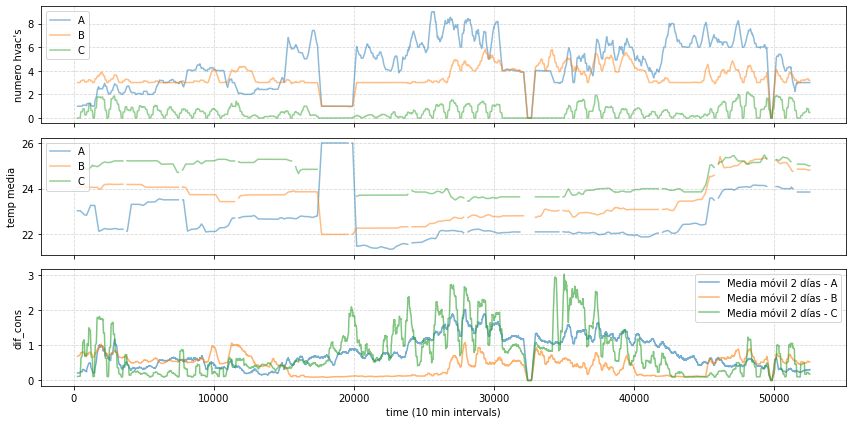

In [60]:
fig, axs = plt.subplots(figsize=(12,6), nrows = 3, ncols =1, sharex =True)

axs[0].plot(hvac_mixedA['V4'].rolling(144*2).mean(), label="A", alpha=0.5)
axs[0].plot(hvac_mixedB['V4'].rolling(144*2).mean(), label="B", alpha=0.5)
axs[0].plot(hvac_mixedC['V4'].rolling(144*2).mean(), label="C", alpha=0.5)
axs[0].grid(linestyle = "--", alpha=0.5)
axs[0].legend(loc="upper left")
axs[0].set_ylabel("numero hvac's")

axs[1].plot(hvac_mixedA['V12'].rolling(144*2).mean(), label="A", alpha=0.5)
axs[1].plot(hvac_mixedB['V12'].rolling(144*2).mean(), label="B", alpha=0.5)
axs[1].plot(hvac_mixedC['V12'].rolling(144*2).mean(), label="C", alpha=0.5)
axs[1].grid(linestyle = "--", alpha=0.5)
axs[1].legend(loc="upper left")
axs[1].set_ylabel("temp media")

#Media móvil de 1 semana
axs[2].plot(consA['dif_cons'].rolling(144*2).mean(), label="Media móvil 2 días - A", alpha=0.6)
axs[2].plot(consB['dif_cons'].rolling(144*2).mean(), label="Media móvil 2 días - B", alpha=0.6)
axs[2].plot(consC['dif_cons'].rolling(144*2).mean(), label="Media móvil 2 días - C", alpha=0.6)
axs[2].grid(linestyle = "--", alpha=0.5)
axs[2].set_ylabel("dif_cons")
axs[2].set_xlabel('time (10 min intervals)')
axs[2].legend()

fig.tight_layout()
plt.show()

## MU62_dm.txt
- Fecha
- Hora
- tmed, tmax, tmin: Temperatura media, máxima y mínima 
- hrmed, hrmax, hrmin: Humedad relativa
- radmed, radmax: Radiación solar (?)
- vvmed, vvmax: vertical visibility
- dvmed: 
- prec
- dewpt: punto de rocío
- dpv: vapor pressure deficit

In [84]:
MU62_dm = pd.read_csv("MU62_dm.txt", sep = ";")
MU62_dm.tail()

,fecha,hora,tmed,tmax,tmin,hrmed,hrmax,hrmin,radmed,radmax,vvmed,vvmax,dvmed,prec,dewpt,dpv
55708,20/02/22,05:20:00,11.4,11.6,11.2,67.6,68.1,67.1,0.0,0.0,0.0,0.0,0.0,0.0,5.6,0.4
55709,20/02/22,05:30:00,11.3,11.5,11.1,68.1,68.7,67.8,0.0,0.0,0.0,0.0,0.0,0.0,5.6,0.4
55710,20/02/22,05:40:00,11.2,11.3,11.1,68.5,68.6,68.3,0.0,0.0,0.0,0.0,0.0,0.0,5.6,0.4
55711,20/02/22,05:50:00,11.1,11.2,11.0,68.5,68.7,68.3,0.0,0.0,0.0,0.0,0.0,0.0,5.6,0.4
55712,20/02/22,06:00:00,11.2,11.3,11.1,68.6,68.8,68.4,0.0,0.0,0.0,0.0,0.0,0.0,5.7,0.4


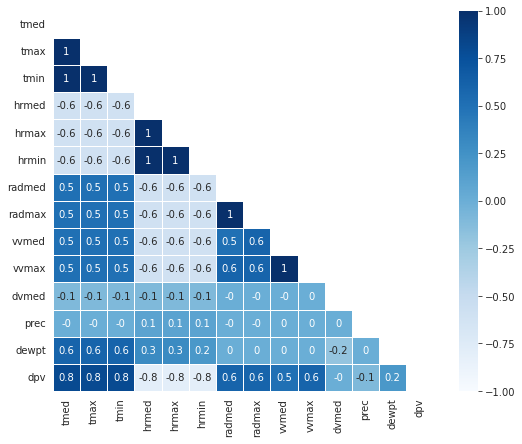

In [116]:
corr=MU62_dm.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(9, 7))
    ax = sns.heatmap(corr.round(1), 
                     xticklabels=corr, yticklabels=corr,
                     mask=mask, vmin=-1, vmax=1, square=True,
                     annot = True, linewidths=.5, cmap="Blues")

Hay algunas de las variables que están totalmente correlacionadas y por tanto podemos quedarnos sólo con algunas de ellas. En concreto, de 'tmax', 'tmin' y 'tmed' nos quedaremos con 'tmed', de 'hrmax','hrmin' y 'hrmed' con 'hrmed',  de 'radmed' y 'radmax' con 'redmed' y de 'vvmed' y 'vvmax' con 'vvmed'.

In [90]:
MU62_dm = MU62_dm[['fecha' ,'hora', 'tmed', 'hrmed', 'radmed', 'vvmed', 'dvmed', 'prec', 'dewpt', 'dpv']]
MU62_dm.to_csv('data-meteo.csv', sep=";", index=False)

In [92]:
pd.read_csv('data-meteo.csv', sep=";").head(3)

,fecha,hora,tmed,hrmed,radmed,vvmed,dvmed,prec,dewpt,dpv
0,01/01/21,00:10:00,3.6,65.4,0.0,0.6,180.7,0.0,-2.3,0.3
1,01/01/21,00:20:00,3.4,64.0,0.0,0.2,191.3,0.0,-2.7,0.3
2,01/01/21,00:30:00,3.5,63.9,0.0,0.2,251.2,0.0,-2.7,0.3


## relations-hvac.csv

Nos da las relaciones entre el id del hvac y la habitación y edificio al que pertenece

- ID: Identificador del hvac
- desc: descripción del dispositivo
- block: edificio
- room: habitación

In [34]:
relations_hvac = pd.read_csv("relations-hvac.csv", sep=",")
relations_hvac.head(3)

,ID,desc,block,room
0,335545147,Unidad Toshiba VRF Pleiades (02.ED136.B1.0.058),B,B1.0.058
1,335545149,Unidad Toshiba VRF Pleiades (02.ED136.B1.0.058),B,B1.0.058
2,335545143,Unidad Toshiba VRF Pleiades (02.ED136.B1.0.059),B,B1.0.059


Es importante darnos cuenta de que algunas de las habitaciones tienen más de un aparato:

In [125]:
print(len(relations_hvac['room'].unique()))
print(len(relations_hvac['ID'].unique()))

79
86


In [37]:
# Para obtener los ids de los aparados correspondientes a cada edificio
#df = relations_hvac.where(relations_hvac['block']=='A').dropna()
#df['ID'].astype(int).unique()

In [61]:
# Para ver las habitaciones con hvac de cada edificio 
#df = relations_hvac.where(relations_hvac['block']=='C').dropna()
#df['room'].unique()

In [62]:
rooms_hvac_A = ['B1.0.000', 'B1.1.010', 'B1.1.009', 'B1.1.023', 'B1.1.024',
       'B1.1.025', 'B1.1.008', 'B1.1.007', 'B1.1.006', 'B1.1.026',
       'B1.1.027', 'B1.2.008', 'B1.2.008.1', 'B1.2.007.1', 'B1.2.024',
       'B1.2.025', 'B1.2.026.1', 'B1.2.026', 'B1.2.026.2', 'B1.2.007',
       'B1.2.006', 'B1.2.027', 'B1.2.027.2', 'B1.2.027.1', 'B1.2.028.1',
       'B1.2.028', 'B1.3.010', 'B1.3.009', 'B1.3.008', 'B1.3.014',
       'B1.3.013', 'B1.3.007', 'B1.3.006', 'B1.3.015', 'B1.3.018.1',
       'B1.3.018.3', 'B1.3.018.2', 'B1.4.010', 'B1.4.009', 'B1.4.008',
       'B1.4.007', 'B1.4.013', 'B1.4.014', 'B1.4.015', 'B1.4.006',
       'B1.4.016', 'B1.4.017']

rooms_hvac_B = ['B1.0.058', 'B1.0.059', 'B1.0.047', 'B1.0.051', 'B1.0.050',
       'B1.0.051.1', 'B1.0.052', 'B1.0.055', 'B1.1.014', 'B1.1.015',
       'B1.1.016', 'B1.1.017', 'B1.2.019', 'B1.2.020', 'B1.2.013',
       'B1.2.014', 'B1.2.015', 'B1.2.016']

rooms_hvac_C = ['B1.1.049', 'B1.1.047', 'B1.1.046', 'B1.1.045', 'B1.1.044',
       'B1.1.043', 'B1.1.042', 'B1.1.041.3', 'B1.1.041.2', 'B1.1.041.1',
       'B1.0.026', 'B1.0.025', 'B1.0.011', 'B1.0.024']

## relations-sensor.csv

Mismo que lo anterior pero con los sensores de temperatura en las habitaciones

In [51]:
relations_sensor = pd.read_csv("relations-sensor.csv", sep = ";")
relations_sensor.head(3)

,ID,desc,block,room
0,335544455,Sensor temperatura sala 4.2,A,B1.4.009
1,335544458,Sensor temperatura sala 4.3,A,B1.4.008
2,335544461,Sensor temperatura sala 4.4,A,B1.4.007


Igual que antes, también hay habitaciones con más de un sensor

In [124]:
print(len(relations_sensor['room'].unique()))
print(len(relations_sensor['ID'].unique()))

61
90


In [ ]:
#Para obtener los ids de los aparados correspondientes a cada edificio
#df = relations_sensor.where(relations_sensor['block']=='A').dropna()
#df['ID'].astype(int).unique()

In [67]:
# Para ver las habitaciones con sensor de cada edificio 
#df = relations_sensor.where(relations_sensor['block']=='C').dropna()
#df['room'].unique()

In [66]:
rooms_sensor_A = ['B1.4.009', 'B1.4.008', 'B1.4.007', 'B1.4.004', 'B1.4.013',
       'B1.4.014', 'B1.4.015', 'B1.4.006', 'B1.4.016', 'B1.4.017',
       'B1.3.010', 'B1.3.009', 'B1.3.014', 'B1.3.008', 'B1.3.007',
       'B1.3.006', 'B1.3.018.3', 'B1.3.018.2', 'B1.3.018.1', 'B1.3.004',
       'B1.2.008', 'B1.2.026', 'B1.2.007', 'B1.2.006', 'B1.2.027',
       'B1.2.027.2', 'B1.2.004', 'B1.2.028', 'B1.1.010', 'B1.1.009',
       'B1.1.023', 'B1.1.024', 'B1.1.025', 'B1.1.005', 'B1.1.008',
       'B1.1.007', 'B1.1.006', 'B1.1.026', 'B1.1.027', 'B1.4.010']

rooms_sensor_B = ['B1.2.020', 'B1.2.013', 'B1.2.014', 'B1.2.015', 'B1.2.016',
       'B1.1.021', 'B1.1.014', 'B1.1.015', 'B1.1.016', 'B1.1.017',
       'B1.1.013', 'B1.0.059', 'B1.1.020', 'B1.2.012', 'B1.2.019',
       'B1.1.016 ', 'B1.2.014 ']

rooms_sensor_C = ['B1.0.026', 'B1.0.025', 'B1.0.024', 'B1.1.029']

Buscamos la intersección entre los conjuntos de habitaciones con hvac y con sensor, ya que si no hay información de uno de los dos no nos servirán:

In [72]:
rooms_A = list(set(rooms_hvac_A).intersection(rooms_sensor_A))
rooms_B = list(set(rooms_hvac_B).intersection(rooms_sensor_B))
rooms_C = list(set(rooms_hvac_C).intersection(rooms_sensor_C))

In [218]:
pd.read_csv('data-room-10T-C.csv', sep=';').head(2)

,Fecha,dif_cons,cumsum,IDhvac,block,room,V12,V6,V4,IDsensor,V2,tmed,hrmed,radmed,vvmed,dvmed,prec,dewpt,dpv
0,2021-01-01 00:10:00+00:00,0.109375,0.79,335545167,C,B1.0.026,23.0,2.0,0.0,335544931,19.9,3.6,65.4,0.0,0.6,180.7,0.0,-2.3,0.3
1,2021-01-01 00:10:00+00:00,0.109375,0.79,335545167,C,B1.0.026,23.0,2.0,0.0,335544934,23.5,3.6,65.4,0.0,0.6,180.7,0.0,-2.3,0.3


## data-room-10T-_.csv

- room
- block
- Id del sensor y hvac
- dif: diferencia de consumo entre fecha y fecha anterior, agregada para cada edificio
- cumsum: consumo acumulado entre fecha y fecha anterior
- V4 (ON/OFF), V6(velocidad del ventilador), V12(setpoint)
- V2 (temperatura sala según sensor)
- Datos meteorológicos

Se obtiene de cons_.csv, temp_sensor_.csv, data-meteo.csv, relations-sensor.csv, relations-hvac, data-hvac.csv, data-sensor.csv

In [179]:
cons = pd.read_csv("consA.csv", sep= ";")                       #Consumo agregado en el edificio A con dif entre fecha y fecha anterior
cons = cons.where(cons['dif_cons']<25).dropna()                 #Quitamos los tres picos del consumo
temp_sensor = pd.read_csv("temp-sensorA.csv", sep=";")          #Sensor: resample cada 10 minutos agrupado por id del aparato
weather = pd.read_csv('data-meteo.csv', sep=';')                #Datos meteorológicos
weather['Fecha']=pd.to_datetime(weather.fecha+ ' '+weather.hora, format='%d/%m/%y %H:%M:%S')
weather = weather.drop(columns=['fecha','hora'])
relations_sensor = pd.read_csv("relations-sensor.csv", sep = ";") #Relaciones entre edificios, sensores y habitación
relations_hvac = pd.read_csv("relations-hvac.csv")                #Relaciones entre edificios, aparatos y habitación

#Cargamos los datos de los aparatos y seleccionamos los correspondientes al eficicio A
#Restringimos los valores válidos de las temperaturas a 15 < x < 38 
#Y nos quedamos sólo con las columnas correspondientes al id del dispositivo, la fecha, V4 (ON/OFF), V6(velocidad del ventilador)y V12(temp consigna)
hvac = pd.read_csv("data-hvac.csv")
#Ids de los HVAC del edificio A
ids = ids_hvac_A
mask = hvac['IDdispositivo'].isin(ids)
hvac = hvac.loc[mask]
mask = (hvac['V12']>15) & (hvac['V12']<38) 
hvac = hvac.loc[mask]
hvac = hvac[["IDdispositivo", "Fecha", "V4", "V6", "V12"]]

#Hacemos un merge con lo anterior y el csv que nos relaciona los ids de los aparatos con la habitación a la que corresponde
#Decimos qué columnas nos quedamos y ponemos la fecha como índice
df1 = pd.merge(hvac, relations_hvac, left_on="IDdispositivo", right_on="ID")
df1 = df1[["Fecha","IDdispositivo", "block", "room","V4", "V6", "V12"]]
df1 = df1.set_index(['Fecha'])
df1.index = pd.to_datetime(df1.index, utc = True)

agg = "10T"
df1_1 = df1.groupby(['IDdispositivo','block', 'room']).resample(agg)['V12'].mean().loc[lambda x: (x>15) & (x <38)].to_frame().reset_index()
df1_2 = df1.groupby(['IDdispositivo','block', 'room']).resample(agg)['V6'].mean().round(0).to_frame().reset_index()
df1_3 = df1.groupby(['IDdispositivo','block', 'room']).resample(agg)['V4'].mean().round(0).to_frame().reset_index()
df1 = pd.merge(df1_1,df1_2)
df1 = pd.merge(df1,df1_3)
df1 = df1.rename(columns={'IDdispositivo': 'IDhvac'})

temp_sensor = pd.read_csv('data-sensor.csv', sep=';')
#Ids de los sensores del edificio A
ids = ids_sensor_A
mask = temp_sensor['IDdispositivo'].isin(ids)
temp_sensor = temp_sensor.loc[mask]
temp_sensor = temp_sensor[["IDdispositivo", "Fecha", "V2"]]

#Le ponemos el formato adecuado a la fecha
cons['Fecha'] =  pd.to_datetime(cons['Fecha'])
temp_sensor['Fecha'] =  pd.to_datetime(temp_sensor['Fecha'])
weather['Fecha'] =  pd.to_datetime(weather['Fecha'], utc = 'True')

#Hacemos el merge con las relaciones de sensor y habitación con el id del sensor
#Ponemos la fecha como índice  y seleccionamos las columnas que nos insteresan
df2 = pd.merge(temp_sensor, relations_sensor, left_on="IDdispositivo", right_on="ID")
df2 = df2.set_index('Fecha')
df2.index = pd.to_datetime(df2.index, utc = True)
df2 = df2[["IDdispositivo", "V2", "block", "room"]]
df2 = df2.groupby(['IDdispositivo','block', 'room']).resample(agg)['V2'].mean().loc[lambda x: (x>15) & (x <38)].to_frame().reset_index()
df2 = df2.rename(columns={'IDdispositivo': 'IDsensor'})

#Juntamos los dataframes anteriores con la información del consumo del edificio B de consB.csv
merge1 = pd.merge(cons, df1, how="inner")
merge2 = pd.merge(merge1, df2, how="inner", on = ["Fecha",'block','room'])
merge2['Fecha'] =  pd.to_datetime(merge2['Fecha'])
merge3 = pd.merge(merge2, weather, how="inner")
#Ponemos el dif y cumsum con solo dos decimales y V2 con 1.
df = merge3.round({'dif': 2,'cumsum': 2, 'V2': 1})

df.to_csv('data-room-' +agg+'-A.csv', sep=";", index=False)

In [188]:
#pd.read_csv('data-room-10T-A.csv', sep=';')

In [181]:
cons = pd.read_csv("consB.csv", sep= ";")                       #Consumo agregado en el edificio B con dif entre fecha y fecha anterior
cons = cons.where(cons['dif_cons']<25).dropna()                 #Quitamos los tres picos del consumo
temp_sensor = pd.read_csv("temp-sensorB.csv", sep=";")          #Sensor: resample cada 10 minutos agrupado por id del aparato
weather = pd.read_csv('data-meteo.csv', sep=';')                #Datos meteorológicos
weather['Fecha']=pd.to_datetime(weather.fecha+ ' '+weather.hora, format='%d/%m/%y %H:%M:%S')
weather = weather.drop(columns=['fecha','hora'])
relations_sensor = pd.read_csv("relations-sensor.csv", sep = ";") #Relaciones entre edificios, sensores y habitación
relations_hvac = pd.read_csv("relations-hvac.csv")                #Relaciones entre edificios, aparatos y habitación

#Cargamos los datos de los aparatos y seleccionamos los correspondientes al eficicio B
#Restringimos los valores válidos de las temperaturas a 15 < x < 38 
#Y nos quedamos sólo con las columnas correspondientes al id del dispositivo, la fecha, V4 (ON/OFF), V6(velocidad del ventilador)y V12(temp consigna)
hvac = pd.read_csv("data-hvac.csv")
#Ids de los HVAC del edificio B
ids = ids_hvac_B
mask = hvac['IDdispositivo'].isin(ids)
hvac = hvac.loc[mask]
mask = (hvac['V12']>15) & (hvac['V12']<38) 
hvac = hvac.loc[mask]
hvac = hvac[["IDdispositivo", "Fecha", "V4", "V6", "V12"]]

#Hacemos un merge con lo anterior y el csv que nos relaciona los ids de los aparatos con la habitación a la que corresponde
#Decimos qué columnas nos quedamos y ponemos la fecha como índice
df1 = pd.merge(hvac, relations_hvac, left_on="IDdispositivo", right_on="ID")
df1 = df1[["Fecha","IDdispositivo", "block", "room","V4", "V6", "V12"]]
df1 = df1.set_index(['Fecha'])
df1.index = pd.to_datetime(df1.index, utc = True)

agg = "10T"
df1_1 = df1.groupby(['IDdispositivo','block', 'room']).resample(agg)['V12'].mean().loc[lambda x: (x>15) & (x <38)].to_frame().reset_index()
df1_2 = df1.groupby(['IDdispositivo','block', 'room']).resample(agg)['V6'].mean().round(0).to_frame().reset_index()
df1_3 = df1.groupby(['IDdispositivo','block', 'room']).resample(agg)['V4'].mean().round(0).to_frame().reset_index()
df1 = pd.merge(df1_1,df1_2)
df1 = pd.merge(df1,df1_3)
df1 = df1.rename(columns={'IDdispositivo': 'IDhvac'})

temp_sensor = pd.read_csv('data-sensor.csv', sep=';')
#Ids de los sensores del edificio B
ids = ids_sensor_B
mask = temp_sensor['IDdispositivo'].isin(ids)
temp_sensor = temp_sensor.loc[mask]
temp_sensor = temp_sensor[["IDdispositivo", "Fecha", "V2"]]

#Le ponemos el formato adecuado a la fecha
cons['Fecha'] =  pd.to_datetime(cons['Fecha'])
temp_sensor['Fecha'] =  pd.to_datetime(temp_sensor['Fecha'])
weather['Fecha'] =  pd.to_datetime(weather['Fecha'], utc = 'True')

#Hacemos el merge con las relaciones de sensor y habitación con el id del sensor
#Ponemos la fecha como índice  y seleccionamos las columnas que nos insteresan
df2 = pd.merge(temp_sensor, relations_sensor, left_on="IDdispositivo", right_on="ID")
df2 = df2.set_index('Fecha')
df2.index = pd.to_datetime(df2.index, utc = True)
df2 = df2[["IDdispositivo", "V2", "block", "room"]]
df2 = df2.groupby(['IDdispositivo','block', 'room']).resample(agg)['V2'].mean().loc[lambda x: (x>15) & (x <38)].to_frame().reset_index()
df2 = df2.rename(columns={'IDdispositivo': 'IDsensor'})

#Juntamos los dataframes anteriores con la información del consumo del edificio B de consB.csv
merge1 = pd.merge(cons, df1, how="inner")
merge2 = pd.merge(merge1, df2, how="inner", on = ["Fecha",'block','room'])
merge2['Fecha'] =  pd.to_datetime(merge2['Fecha'])
merge3 = pd.merge(merge2, weather, how="inner")
#Ponemos el dif y cumsum con solo dos decimales y V2 con 1.
df = merge3.round({'dif': 2,'cumsum': 2, 'V2': 1})

df.to_csv('data-room-' +agg+'-B.csv', sep=";", index=False)

In [187]:
#pd.read_csv('data-room-10T-B.csv', sep=';')

In [183]:
cons = pd.read_csv("consC.csv", sep= ";")                       #Consumo agregado en el edificio C con dif entre fecha y fecha anterior
cons = cons.where(cons['dif_cons']<25).dropna()                 #Quitamos los tres picos del consumo
temp_sensor = pd.read_csv("temp-sensorC.csv", sep=";")          #Sensor: resample cada 10 minutos agrupado por id del aparato
weather = pd.read_csv('data-meteo.csv', sep=';')                #Datos meteorológicos
weather['Fecha']=pd.to_datetime(weather.fecha+ ' '+weather.hora, format='%d/%m/%y %H:%M:%S')
weather = weather.drop(columns=['fecha','hora'])
relations_sensor = pd.read_csv("relations-sensor.csv", sep = ";") #Relaciones entre edificios, sensores y habitación
relations_hvac = pd.read_csv("relations-hvac.csv")                #Relaciones entre edificios, aparatos y habitación

#Cargamos los datos de los aparatos y seleccionamos los correspondientes al eficicio B
#Restringimos los valores válidos de las temperaturas a 15 < x < 38 
#Y nos quedamos sólo con las columnas correspondientes al id del dispositivo, la fecha, V4 (ON/OFF), V6(velocidad del ventilador)y V12(temp consigna)
hvac = pd.read_csv("data-hvac.csv")
#Ids de los HVAC del edificio C
ids = ids_hvac_C
mask = hvac['IDdispositivo'].isin(ids)
hvac = hvac.loc[mask]
mask = (hvac['V12']>15) & (hvac['V12']<38) 
hvac = hvac.loc[mask]
hvac = hvac[["IDdispositivo", "Fecha", "V4", "V6", "V12"]]

#Hacemos un merge con lo anterior y el csv que nos relaciona los ids de los aparatos con la habitación a la que corresponde
#Decimos qué columnas nos quedamos y ponemos la fecha como índice
df1 = pd.merge(hvac, relations_hvac, left_on="IDdispositivo", right_on="ID")
df1 = df1[["Fecha","IDdispositivo", "block", "room","V4", "V6", "V12"]]
df1 = df1.set_index(['Fecha'])
df1.index = pd.to_datetime(df1.index, utc = True)

agg = "10T"
df1_1 = df1.groupby(['IDdispositivo','block', 'room']).resample(agg)['V12'].mean().loc[lambda x: (x>15) & (x <38)].to_frame().reset_index()
df1_2 = df1.groupby(['IDdispositivo','block', 'room']).resample(agg)['V6'].mean().round(0).to_frame().reset_index()
df1_3 = df1.groupby(['IDdispositivo','block', 'room']).resample(agg)['V4'].mean().round(0).to_frame().reset_index()
df1 = pd.merge(df1_1,df1_2)
df1 = pd.merge(df1,df1_3)
df1 = df1.rename(columns={'IDdispositivo': 'IDhvac'})

temp_sensor = pd.read_csv('data-sensor.csv', sep=';')
#Ids de los sensores del edificio C
ids = ids_sensor_C
mask = temp_sensor['IDdispositivo'].isin(ids)
temp_sensor = temp_sensor.loc[mask]
temp_sensor = temp_sensor[["IDdispositivo", "Fecha", "V2"]]

#Le ponemos el formato adecuado a la fecha
cons['Fecha'] =  pd.to_datetime(cons['Fecha'])
temp_sensor['Fecha'] =  pd.to_datetime(temp_sensor['Fecha'])
weather['Fecha'] =  pd.to_datetime(weather['Fecha'], utc = 'True')

#Hacemos el merge con las relaciones de sensor y habitación con el id del sensor
#Ponemos la fecha como índice  y seleccionamos las columnas que nos insteresan
df2 = pd.merge(temp_sensor, relations_sensor, left_on="IDdispositivo", right_on="ID")
df2 = df2.set_index('Fecha')
df2.index = pd.to_datetime(df2.index, utc = True)
df2 = df2[["IDdispositivo", "V2", "block", "room"]]
df2 = df2.groupby(['IDdispositivo','block', 'room']).resample(agg)['V2'].mean().loc[lambda x: (x>15) & (x <38)].to_frame().reset_index()
df2 = df2.rename(columns={'IDdispositivo': 'IDsensor'})

#Juntamos los dataframes anteriores con la información del consumo del edificio B de consB.csv
merge1 = pd.merge(cons, df1, how="inner")
merge2 = pd.merge(merge1, df2, how="inner", on = ["Fecha",'block','room'])
merge2['Fecha'] =  pd.to_datetime(merge2['Fecha'])
merge3 = pd.merge(merge2, weather, how="inner")
#Ponemos el dif y cumsum con solo dos decimales y V2 con 1.
df = merge3.round({'dif': 2,'cumsum': 2, 'V2': 1})

df.to_csv('data-room-' +agg+'-C.csv', sep=";", index=False)

In [186]:
#pd.read_csv('data-room-10T-C.csv', sep=';')

Juntamos todo en un mismo csv

In [189]:
agg = "10T"

In [195]:
A = pd.read_csv('data-room-' +agg+'-A.csv', sep=";")
B = pd.read_csv('data-room-' +agg+'-B.csv', sep=";")
C = pd.read_csv('data-room-' +agg+'-C.csv', sep=";")

In [196]:
cols = [0,5,4,3,9,1,2,10,6,7,8]+list(range(11,18)) #Para reordenar
df = pd.concat([A,B,C]).sort_values(by=['Fecha'])
df = df.iloc[:,cols]
print(df.shape)
df.head(3)

(2396282, 18)


,Fecha,room,block,IDhvac,IDsensor,dif_cons,cumsum,V2,V12,V6,V4,tmed,hrmed,radmed,vvmed,dvmed,prec,dewpt
0,2021-01-01 00:10:00+00:00,B1.1.008,A,335545221,335544790,0.234375,1.55,19.9,21.0,2.0,0.0,3.6,65.4,0.0,0.6,180.7,0.0,-2.3
23,2021-01-01 00:10:00+00:00,B1.4.015,A,335545307,335544491,0.234375,1.55,25.5,22.0,3.0,0.0,3.6,65.4,0.0,0.6,180.7,0.0,-2.3
24,2021-01-01 00:10:00+00:00,B1.4.006,A,335545309,335544499,0.234375,1.55,22.9,21.0,2.0,0.0,3.6,65.4,0.0,0.6,180.7,0.0,-2.3


In [197]:
df.to_csv('data-room-' +agg+'.csv', sep=";", index=False)

In [223]:
pd.read_csv('data-room-10T.csv', sep=";", index_col=0).tail(3)

array([0., 1.])

**Fichero data-room-10T-all.csv**

- Creamos un dataframe, que llamamos df_time, cuyas columnas son una fecha, con entradas cada 10 minutos desde el 2021-01-01 0:00:00 hasta 2021-12-18 13:30:00+00:00, usando un range con el módulo datetime y después reperición con np.repeat; las 50 habitaciones en las que hay datos en esas fechas, de forma que tenemos cada fecha 50 veces, una por habitación; y el edificio correspondiente a cada habitación, para al hacer el merge, poder conservar esa información.


- Partiendo de data-room-10T.csv, ponemos el tipo de datos de los ids del sensor y hvac como string (podríamos quitarlos directamente), ya que no queremos que con esos enteros se haga una media al hacer groupby().


- Hacemos groupby por Fecha, Block y Room, y después ponemos la fecha como string para que sea el mismo tipo de dato que la fecha del df_time.


- Hacemos el merge como left join del df_time sobre los datos agrupados con las columnas de Fecha, Room y Block. Esto no da un dataframe con una 50 entradas para una fecha, cada 10 minutos, durante cerca de 90 días, de forma que para las habitaciones que en alguna fecha no había alguno de los datos (temp, on/off, etc) tendremos valores nulos.

In [200]:
import datetime
import numpy as np

In [226]:
rooms = rooms_A + rooms_B + rooms_C

In [227]:
dti = pd.date_range("2021-01-01 00:00:00", periods=52560, freq="10T")
dti = dti.tz_localize("UTC")
df_time = pd.DataFrame()
df_time['Fecha'] = np.repeat(dti.astype(str),50)
rooms = rooms
df_time['room'] = rooms*52560  #365*24*6=52560
df_time['block'] = (list(np.repeat('A',36)) + list(np.repeat('B',11)) + list(np.repeat('C',3)))*52560
df_time

,Fecha,room,block
0,2021-01-01 00:00:00+00:00,B1.2.027.2,A
1,2021-01-01 00:00:00+00:00,B1.3.018.2,A
2,2021-01-01 00:00:00+00:00,B1.4.017,A
3,2021-01-01 00:00:00+00:00,B1.1.026,A
4,2021-01-01 00:00:00+00:00,B1.4.007,A
...,...,...,...
2627995,2021-12-31 23:50:00+00:00,B1.0.059,B
2627996,2021-12-31 23:50:00+00:00,B1.2.014,B
2627997,2021-12-31 23:50:00+00:00,B1.0.025,C
2627998,2021-12-31 23:50:00+00:00,B1.0.024,C


In [228]:
df = pd.read_csv('data-room-10T.csv', sep=";")
df = df.astype({'IDhvac': 'string', 'IDsensor': 'string'})
df = df.groupby(['Fecha', 'room', 'block']).mean().reset_index()
df = df.astype({'Fecha': 'string'})
print(df.shape)
df.head(3)

(2017596, 16)


,Fecha,room,block,dif_cons,cumsum,V2,V12,V6,V4,tmed,hrmed,radmed,vvmed,dvmed,prec,dewpt
0,2021-01-01 00:10:00+00:00,B1.0.024,C,0.109375,0.79,23.0,23.0,4.0,0.0,3.6,65.4,0.0,0.6,180.7,0.0,-2.3
1,2021-01-01 00:10:00+00:00,B1.0.025,C,0.109375,0.79,22.6,23.0,3.0,0.0,3.6,65.4,0.0,0.6,180.7,0.0,-2.3
2,2021-01-01 00:10:00+00:00,B1.0.026,C,0.109375,0.79,21.7,23.0,2.5,0.0,3.6,65.4,0.0,0.6,180.7,0.0,-2.3


In [229]:
merge1 = pd.merge(df_time, df, how = 'left', on=['Fecha','room', 'block']).round({'dif': 2,'cumsum': 2, 'V2': 1, 'V4':0})
merge1.to_csv('data-room-10T-all.csv', sep=";", index = False)

In [17]:
datos = pd.read_csv("data-room-10T-all.csv", sep = ";", index_col=0)
print(datos.shape)
datos.iloc[805012:805050,:]

(2628000, 15)


,room,block,dif_cons,cumsum,V2,V12,V6,V4,tmed,hrmed,radmed,vvmed,dvmed,prec,dewpt
Fecha,,,,,,,,,,,,,,,
2021-04-22 19:20:00+00:00,B1.1.007,A,0.437500,7354.42,24.0,21.0,2.0,0.0,16.3,69.6,0.0,1.2,56.4,0.0,10.8
2021-04-22 19:20:00+00:00,B1.3.008,A,0.437500,7354.42,29.2,29.0,5.0,1.0,16.3,69.6,0.0,1.2,56.4,0.0,10.8
2021-04-22 19:20:00+00:00,B1.1.010,A,0.437500,7354.42,24.2,21.0,2.0,0.0,16.3,69.6,0.0,1.2,56.4,0.0,10.8
2021-04-22 19:20:00+00:00,B1.2.028,A,0.437500,7354.42,23.5,23.0,2.0,1.0,16.3,69.6,0.0,1.2,56.4,0.0,10.8
2021-04-22 19:20:00+00:00,B1.2.026,A,0.437500,7354.42,26.1,21.0,3.0,0.0,16.3,69.6,0.0,1.2,56.4,0.0,10.8
2021-04-22 19:20:00+00:00,B1.4.009,A,0.437500,7354.42,25.3,26.0,2.0,0.0,16.3,69.6,0.0,1.2,56.4,0.0,10.8
2021-04-22 19:20:00+00:00,B1.3.018.3,A,0.437500,7354.42,26.1,25.0,4.0,0.0,16.3,69.6,0.0,1.2,56.4,0.0,10.8
2021-04-22 19:20:00+00:00,B1.1.006,A,0.437500,7354.42,24.7,29.0,2.0,0.0,16.3,69.6,0.0,1.2,56.4,0.0,10.8
2021-04-22 19:20:00+00:00,B1.3.007,A,0.437500,7354.42,27.0,23.0,3.0,0.0,16.3,69.6,0.0,1.2,56.4,0.0,10.8


In [231]:
datos['V4'].unique()

array([nan,  0.,  1.])

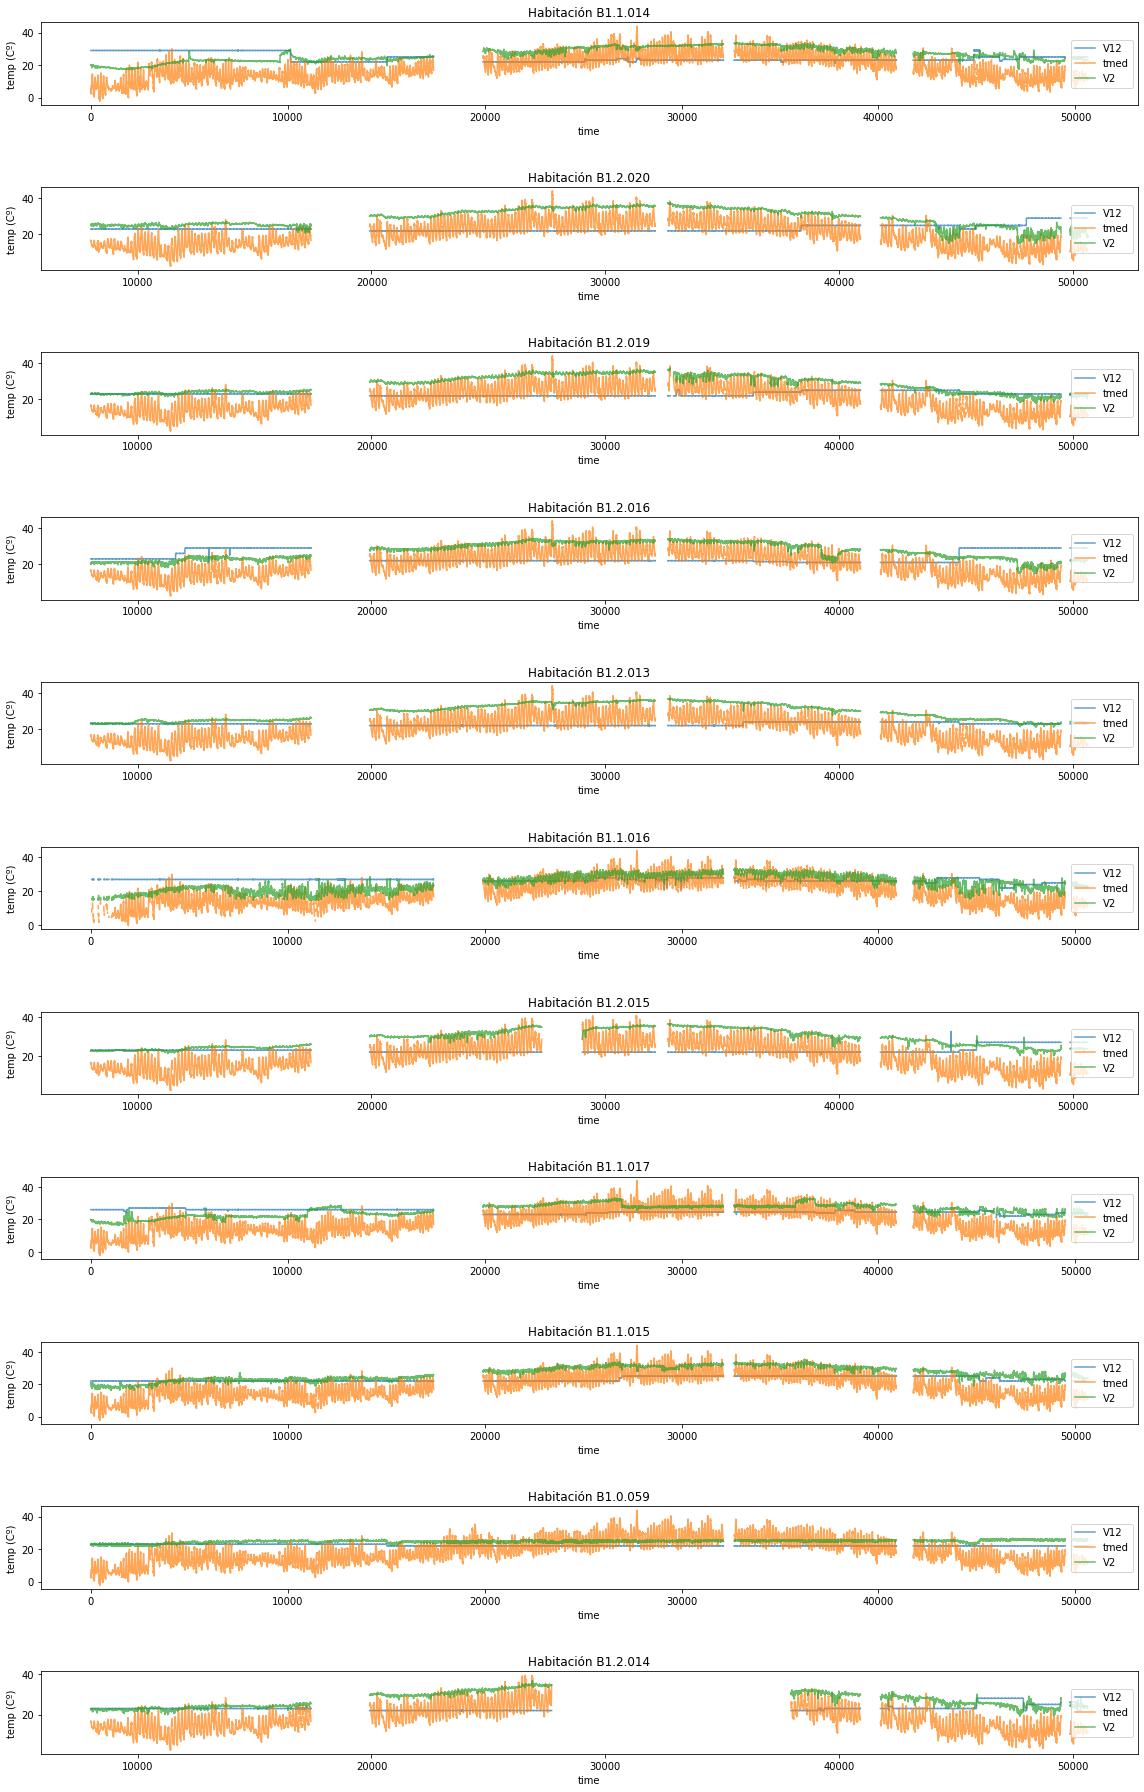

In [219]:
#EDIFICIO B
rooms = rooms_B
#Hacemos un plot por cada habitación
fig, axes = plt.subplots(figsize=(16,25), nrows = len(rooms), ncols = 1, sharex=False, sharey= False)

for count,room in enumerate(rooms):
    mask = datos['room'].isin([room])
    datos_room = datos.loc[mask]
    datos_room[['V12', 'tmed','V2']].plot(ax=axes[count], use_index = False, alpha =0.7) #Si ponemos el index de fecha ocupa mucho y no se lee bien
    axes[count].set_title('Habitación ' + room)
    axes[count].set_ylabel('temp (Cº)')
    axes[count].set_xlabel('time')
    axes[count].legend(loc="right")
fig.tight_layout()
#Para rotar los labels del eje x si lo ponemos con fecha, ya que sin rotar solapan
#for ax in fig.axes:
#    plt.sca(ax)
#    plt.xticks(rotation=0)
#Para aumentar el espaciado vertical entre gráficas
fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=1)

Las habitaciones tipo B1.2.xxx tienen valores ausentes todas en el mismo período, e igual ocurre con las B1.1.xxx, con alguna excepción en ambos casos.

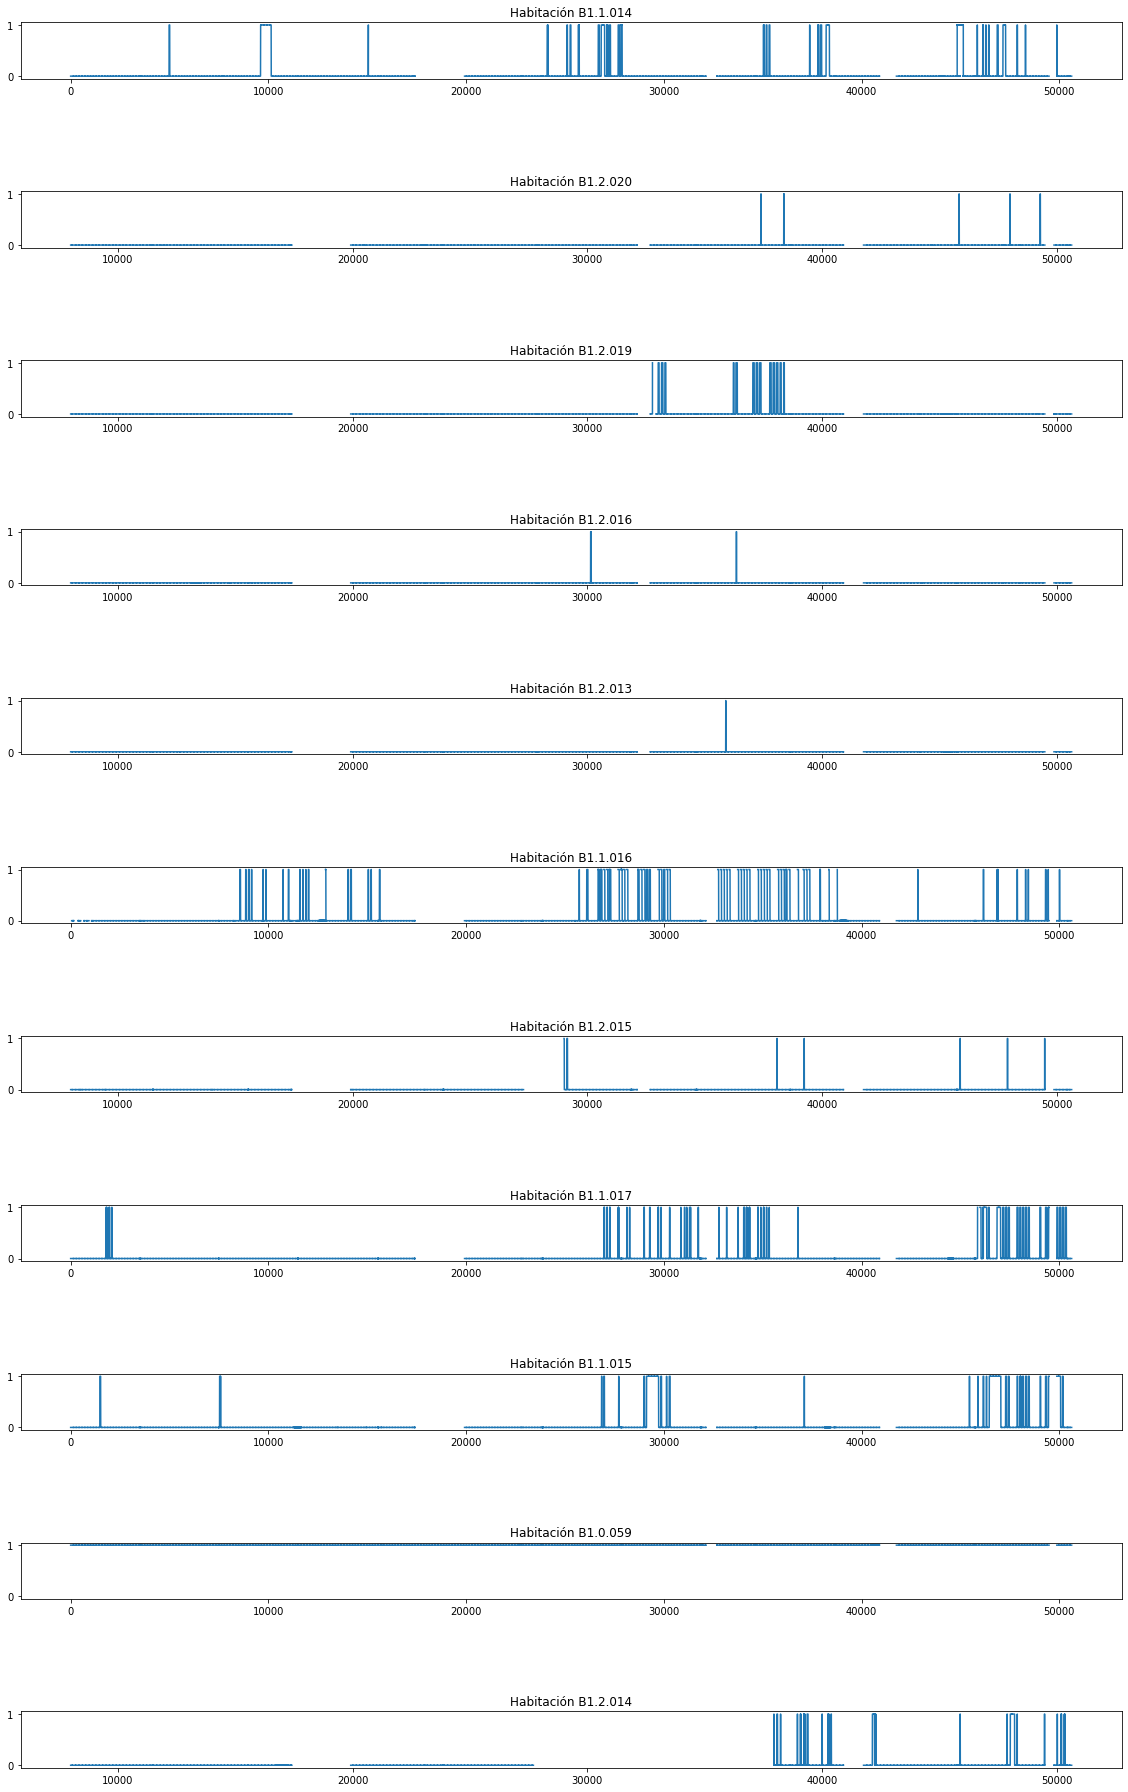

In [232]:
#Visualización del patrón ON/OFF de las habitaciones

rooms = rooms_B

#Hacemos un plot por cada habitación
fig, axes = plt.subplots(figsize=(16,25), nrows = len(rooms), ncols = 1, sharex=False, sharey= True)

for count,room in enumerate(rooms):
    mask = datos['room'].isin([room])
    datos_room = datos.loc[mask]
    datos_room['V4'].plot(ax=axes[count], use_index = False) #Si ponemos el index de fecha ocupa mucho y no se lee bien
    axes[count].set_title('Habitación ' + room)
fig.tight_layout()
#Para rotar los labels del eje x si lo ponemos con fecha, ya que sin rotar solapan
#for ax in fig.axes:
#    plt.sca(ax)
#    plt.xticks(rotation=0)
#Para aumentar el espaciado vertical entre gráficas
fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=2)

In [235]:
df = pd.concat([datos[['dif_cons','room','V12','V2','tmed']].groupby('room').mean().rename(columns={'dif_cons':'dif_cons_mean', 'V12':'V12_mean', 'V2':'V2_mean', 'tmed':'tmed_mean'})
                , datos[['dif_cons','room','V12','V2','tmed']].groupby('room').std().rename(columns={'dif_cons':'dif_cons_sd', 'V12':'V12_sd', 'V2':'V2_sd', 'tmed':'tmed_sd'})], axis=1)
df = df[['dif_cons_mean', 'dif_cons_sd', 'V12_mean', 'V12_sd','V2_mean', 'V2_sd', 'tmed_mean','tmed_sd']]
df.head()

,dif_cons_mean,dif_cons_sd,V12_mean,V12_sd,V2_mean,V2_sd,tmed_mean,tmed_sd
room,,,,,,,,
B1.0.024,0.824711,1.224960,22.568362,0.798433,26.005907,2.858875,18.890613,7.617022
B1.0.025,0.824737,1.224978,22.491835,0.510898,25.832405,2.820780,18.890659,7.617026
B1.0.026,0.826238,1.225758,23.613505,0.257413,26.567907,2.963295,18.899723,7.619901
B1.0.059,0.446290,0.345220,22.308448,0.461857,24.764000,0.862464,18.996790,7.531826
B1.1.006,0.829470,0.611958,24.465932,3.841463,26.535040,3.478971,19.349744,7.326727


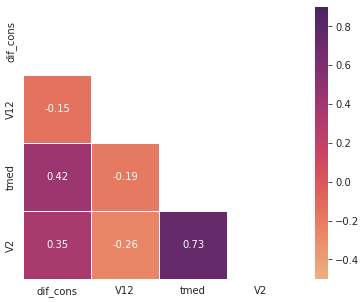

In [238]:
corr=datos[['dif_cons','V12', 'tmed', 'V2']].corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(7, 5))
    ax = sns.heatmap(corr, 
                     xticklabels=corr, yticklabels=corr,
                     mask=mask, vmin=-0.5, vmax=0.9, square=True,
                     annot = True, linewidths=.5, cmap="flare")

In [239]:
datos_ON_A = datos.where((datos['V4']==1) & (datos['block'].isin(['A']))).dropna()
datos_ON_B = datos.where((datos['V4']==1) & (datos['block'].isin(['B']))).dropna()
datos_ON_C = datos.where((datos['V4']==1) & (datos['block'].isin(['C']))).dropna()
datos_OFF_A = datos.where((datos['V4']==0) & (datos['block'].isin(['A']))).dropna()
datos_OFF_B = datos.where((datos['V4']==0) & (datos['block'].isin(['B']))).dropna()
datos_OFF_C = datos.where((datos['V4']==0) & (datos['block'].isin(['C']))).dropna()

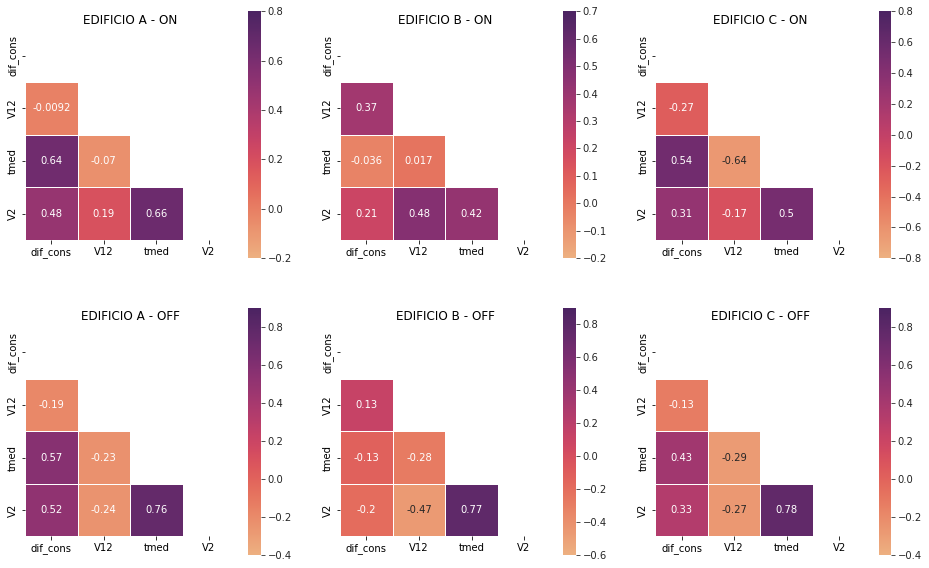

In [261]:
corr_ON_A=datos_ON_A[['dif_cons', 'V12', 'tmed', 'V2']].corr()
corr_ON_B=datos_ON_B[['dif_cons', 'V12', 'tmed', 'V2']].corr()
corr_ON_C=datos_ON_C[['dif_cons', 'V12', 'tmed', 'V2']].corr()
corr_OFF_A=datos_OFF_A[['dif_cons', 'V12', 'tmed', 'V2']].corr()
corr_OFF_B=datos_OFF_B[['dif_cons', 'V12', 'tmed', 'V2']].corr()
corr_OFF_C=datos_OFF_C[['dif_cons', 'V12', 'tmed', 'V2']].corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

fig = plt.figure(figsize = (16,10)) # width x height
ax1 = fig.add_subplot(2, 3, 1) # row, column, position
ax2 = fig.add_subplot(2, 3, 2)
ax3 = fig.add_subplot(2, 3, 3)
ax4 = fig.add_subplot(2, 3, 4) 
ax5 = fig.add_subplot(2, 3, 5)
ax6 = fig.add_subplot(2, 3, 6)

with sns.axes_style("white"):
    ax1 = sns.heatmap(corr_ON_A, ax=ax1, xticklabels=corr, yticklabels=corr, mask=mask, vmin=-0.2, vmax=0.8, 
                      square=True, annot = True, linewidths=.5, cmap="flare")
    ax1.set_title('EDIFICIO A - ON')
    ax2 = sns.heatmap(corr_ON_B, ax=ax2, xticklabels=corr, yticklabels=corr, mask=mask, vmin=-0.2, vmax=0.7, 
                      square=True, annot = True, linewidths=.5, cmap="flare") 
    ax2.set_title('EDIFICIO B - ON') 
    ax3 = sns.heatmap(corr_ON_C, ax=ax3, xticklabels=corr, yticklabels=corr, mask=mask, vmin=-0.8, vmax=0.8, 
                      square=True, annot = True, linewidths=.5, cmap="flare") 
    ax3.set_title('EDIFICIO C - ON')     
    ax4 = sns.heatmap(corr_OFF_A, ax=ax4, xticklabels=corr, yticklabels=corr, mask=mask, vmin=-0.4, vmax=0.9, 
                      square=True, annot = True, linewidths=.5, cmap="flare")
    ax4.set_title('EDIFICIO A - OFF')
    ax5 = sns.heatmap(corr_OFF_B, ax=ax5, xticklabels=corr, yticklabels=corr, mask=mask, vmin=-0.6, vmax=0.9, 
                      square=True, annot = True, linewidths=.5, cmap="flare") 
    ax5.set_title('EDIFICIO B - OFF') 
    ax6 = sns.heatmap(corr_OFF_C, ax=ax6, xticklabels=corr, yticklabels=corr, mask=mask, vmin=-0.4, vmax=0.9, 
                      square=True, annot = True, linewidths=.5, cmap="flare") 
    ax6.set_title('EDIFICIO C - OFF') 


- Hay una alta correlación entre tmed y V2, algo que tiene sentido dado que la temperatura exterior va a condicionar la interior medida por el sensor.
- En el edificio A el consumo está correlacionado con tmed (y también con V2)
- En el edificio C hay correlación negativa entre tmed y V12 cuando está ON, esto se puede entender porque el hvac se estará usando de forma que si fuera hace calor dé aire frío, y si hace frío, dé el aire caliente.
- No se ve correlación entre el dif_cons y V12, un hecho un tanto extraño ya que se podría esperar que el setpoint sí condicionase el consumo.